In [3]:

import pandas as pd
import os 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from PIL import Image
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties
from matplotlib.text import Text

In [4]:
font = FontProperties()
font.set_weight('bold')  # Set font weight to bold
font.set_size(10)

In [5]:
def combine_all_stations(appending_files_folder=None):
  
    contents = os.listdir(appending_files_folder)
 
    df = pd.read_csv(appending_files_folder + "\\" + contents[0]) 

    for item in contents[1:]:
        df = df._append(pd.read_csv(appending_files_folder + "\\" + item),ignore_index=True)
    df['date'] = pd.to_datetime( df[['YEAR', 'MONTH', 'DAY']])
    df['date']=df['date'].dt.strftime('%Y-%m-%d')
    df['IGS_PWV']=df['IGS_PWV'] * pow(10,3)
    df['NGL_PWV']=df['NGL_PWV'] * pow(10,3)
    df['VMF3_PWV']=df['VMF3_PWV'] * pow(10,3)
    df['ERA5_PWV']=df['ERA5_PWV']*pow(10,3)
    df.set_index('date', inplace=True)
        # df['Date'].dt.strftime('%Y-%m-%d')
    return df   

In [6]:
ninetyfivecombined = combine_all_stations()

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

In [5]:
ninetyfivecombined

,Unnamed: 0,STN,DOY,YEAR,MONTH,DAY,LAT,LON,H,IGS_PWV,NGL_PWV,VMF3_PWV,ERA5_PWV
date,,,,,,,,,,,,,
2015-01-01,0,ABPO,1,2015,1,1,-19.018,47.229,1552.992,0.032789,0.033899,0.034687,0.034321
2015-01-02,1,ABPO,2,2015,1,2,-19.018,47.229,1552.992,0.035284,0.036190,0.036514,0.037062
2015-01-03,2,ABPO,3,2015,1,3,-19.018,47.229,1552.992,0.037180,0.038370,0.038742,0.037925
2015-01-04,3,ABPO,4,2015,1,4,-19.018,47.229,1552.992,0.038139,0.038443,0.037607,0.039508
2015-01-05,4,ABPO,5,2015,1,5,-19.018,47.229,1552.992,0.037346,0.038251,0.037227,0.038283
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-26,2327,ZAMB,2795,2022,8,26,-15.426,28.311,1324.914,0.012512,0.013450,0.011814,0.013250
2022-08-27,2328,ZAMB,2796,2022,8,27,-15.426,28.311,1324.914,0.011208,0.012037,0.010858,0.011971
2022-08-28,2329,ZAMB,2797,2022,8,28,-15.426,28.311,1324.914,0.011094,0.011016,0.010746,0.009896


In [7]:
def aggregatebymean(data,groubycoumn,dictionary_of_columns_with_agg_method):
    return data.groupby(groubycoumn,as_index=False).agg(dictionary_of_columns_with_agg_method)
    
    

In [8]:
aggregated_average = aggregatebymean(ninetyfivecombined,'STN',{'LAT':'mean','LON':'mean','IGS_PWV':'mean','NGL_PWV':'mean','VMF3_PWV':'mean','ERA5_PWV':'mean'})

In [9]:
def SimpleBarPlot(x,y,xlabel,ylabel,plot_title):
    plt.figure(figsize=(15, 6))
    plt.bar(x,y,width=0.3)
    plt.xticks(rotation=45)  
    plt.xlabel(xlabel,fontsize=12,fontweight='bold')
    plt.ylabel(ylabel,fontsize=12,fontweight='bold')
    plt.title(plot_title,fontsize=10,fontweight='bold')

plt.show()

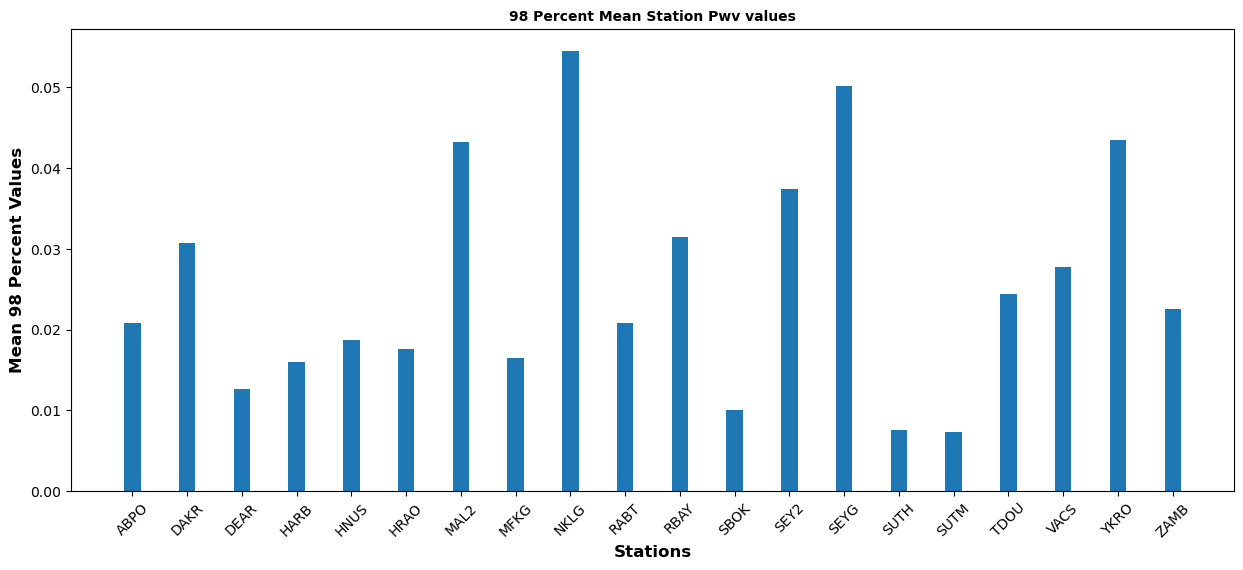

In [10]:
SimpleBarPlot(aggregated_average['STN'],aggregated_average['IGS_PWV'],'Stations','Mean 98 Percent Values','98 Percent Mean Station Pwv values')

In [7]:

def Station_Extraction(STATION_NAME,data):
    return data[data['STN']== STATION_NAME]

In [12]:
def Extract_individual_Year_of_Station(EXTRACTED_STATION,YEAR):
    return EXTRACTED_STATION[EXTRACTED_STATION['YEAR'] == YEAR]

In [5]:
data = combine_all_stations()

In [14]:
NKLG_STATION = Station_Extraction('NKLG',data)

In [15]:
NKLG_STATION

,STN,DOY,YEAR,MONTH,DAY,LAT,LON,H,IGS_PWV,NGL_PWV,VMF3_PWV,ERA5_PWV
date,,,,,,,,,,,,
2019-01-01,NKLG,1462,2019,1,1,0.354,9.672,31.496,0.056463,0.056958,0.057272,0.056604
2019-01-02,NKLG,1463,2019,1,2,0.354,9.672,31.496,0.056704,0.055594,0.055554,0.055829
2019-01-03,NKLG,1464,2019,1,3,0.354,9.672,31.496,0.057579,0.057290,0.056090,0.056617
2019-01-04,NKLG,1465,2019,1,4,0.354,9.672,31.496,0.057585,0.058247,0.058984,0.059196
2019-01-05,NKLG,1466,2019,1,5,0.354,9.672,31.496,0.055864,0.055479,0.056098,0.055567
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,NKLG,2187,2020,12,26,0.354,9.672,31.496,0.054458,0.054217,0.054628,0.054258
2020-12-27,NKLG,2188,2020,12,27,0.354,9.672,31.496,0.054266,0.053448,0.052997,0.052721
2020-12-28,NKLG,2189,2020,12,28,0.354,9.672,31.496,0.056093,0.054412,0.054354,0.054913


In [5]:

def SinglePlot(EXTRACTED_STATION_NAME,column_name,extraction_year,station_name):
    
    station_2015 = Extract_individual_Year_of_Station(EXTRACTED_STATION_NAME,extraction_year)
    print(len(station_2015))
    print(len(EXTRACTED_STATION_NAME))
    
    fig, axs = plt.subplots(3, 3,figsize=(15, 14))
    annual_decomposition_IGS_PWV = sm.tsa.seasonal_decompose(station_2015[column_name['IGS_PWV']], model='additive',period=30)
    semi_annual_decomposition_IGS_PWV= sm.tsa.seasonal_decompose(station_2015[column_name['IGS_PWV']], model='additive',period=175)
    inter_annual_decomposition_IGS_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME[column_name['IGS_PWV']], model='additive',period=348)
    four_cycle_decomposition_IGS_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME[column_name['IGS_PWV']], model='additive',period=116)


    annual_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(station_2015[column_name['NGL_PWV']], model='additive',period=30)
    semi_annual_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(station_2015[column_name['NGL_PWV']], model='additive',period=175)
    inter_annual_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME[column_name['NGL_PWV']], model='additive',period=348)
    four_cycle_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME[column_name['NGL_PWV']], model='additive',period=116)
    

    annual_decomposition_VMF3_PWV = sm.tsa.seasonal_decompose(station_2015[column_name['VMF3_PWV']], model='additive',period=30)
    semi_annual_decomposition_VMF3_PWV= sm.tsa.seasonal_decompose(station_2015[column_name['VMF3_PWV']], model='additive',period=175)
    inter_annual_decomposition_VMF3_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME[column_name['VMF3_PWV']], model='additive',period=348)
    four_cycle_decomposition_VMF3_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME[column_name['VMF3_PWV']], model='additive',period=116)

    annual_decomposition_ERA5_PWV = sm.tsa.seasonal_decompose(station_2015[column_name['ERA5_PWV']], model='additive',period=30)
    semi_annual_decomposition_ERA5_PWV= sm.tsa.seasonal_decompose(station_2015[column_name['ERA5_PWV']], model='additive',period=175)
    inter_annual_decomposition_ERA5_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME[column_name['ERA5_PWV']], model='additive',period=348)
    four_cycle_decomposition_ERA5_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME[column_name['ERA5_PWV']], model='additive',period=116)
    
     # Assuming monthly data with a frequency of 12
    axs[0, 0].plot(EXTRACTED_STATION_NAME[column_name['IGS_PWV']].index, EXTRACTED_STATION_NAME[column_name['IGS_PWV']],color='red',label = 'IGS_PWV')
    axs[0, 0].plot(EXTRACTED_STATION_NAME[column_name['NGL_PWV']].index, EXTRACTED_STATION_NAME[column_name['NGL_PWV']],color='blue',label = 'NGL_PWV')
    axs[0, 0].plot(EXTRACTED_STATION_NAME[column_name['VMF3_PWV']].index, EXTRACTED_STATION_NAME[column_name['VMF3_PWV']],color='yellow',label = 'VMF3_PWV')
    axs[0, 0].plot(EXTRACTED_STATION_NAME[column_name['ERA5_PWV']].index, EXTRACTED_STATION_NAME[column_name['ERA5_PWV']],color='green',label = 'ERA5_PWV')
    axs[0, 0].set_title('PWV')
    axs[0, 0].set_ylabel('PWV')
    axs[0,0].legend(fontsize=5)
    plt.setp(axs[0, 0].get_xticklabels(), rotation=45)

    df = EXTRACTED_STATION_NAME
    df['Inter-Annual-IGS_PWV'] = df[column_name['IGS_PWV']].diff(12)
    df['Inter-Annual-NGL_PWV'] = df[column_name['NGL_PWV']].diff(12)
    df['Inter-Annual-VMF3_PWV'] = df[column_name['VMF3_PWV']].diff(12)
    df['Inter-Annual-ERA5_PWV'] = df[column_name['ERA5_PWV']].diff(12)
    axs[0, 1].plot(df.index, df['Inter-Annual-IGS_PWV'],color='red',label = 'IGS_PWV')
    axs[0, 1].plot(df.index, df['Inter-Annual-NGL_PWV'],color='blue',label = 'NGL_PWV')
    axs[0, 1].plot(df.index, df['Inter-Annual-VMF3_PWV'],color='yellow',label = 'VMF3_PWV')
    axs[0, 1].plot(df.index, df['Inter-Annual-ERA5_PWV'],color='green',label = 'ERA5_PWV')
    axs[0, 1].set_title('Inter Annual Variability')
    axs[0, 1].set_ylabel('Interannual biases')
    axs[0,1].legend(fontsize=5)
    plt.setp(axs[0, 1].get_xticklabels(), rotation=45)

    axs[0, 2].plot(four_cycle_decomposition_IGS_PWV.trend.index, four_cycle_decomposition_IGS_PWV.trend,color='red',label = 'IGS_PWV')
    axs[0, 2].plot(four_cycle_decomposition_NGL_PWV.trend.index, four_cycle_decomposition_NGL_PWV.trend,color='blue',label = 'NGL_PWV')
    axs[0, 2].plot(four_cycle_decomposition_VMF3_PWV.trend.index, four_cycle_decomposition_VMF3_PWV.trend,color='yellow',label = 'VMF3_PWV')
    axs[0, 2].plot(four_cycle_decomposition_ERA5_PWV.trend.index, four_cycle_decomposition_ERA5_PWV.trend,color='green',label = 'ERA5_PWV')
    axs[0, 2].set_title(f"{extraction_year} Four Cycle Trend(Summer, Winter, Spring,Fall)")
    axs[0, 2].set_ylabel(' Four Cycle Trend ')
    axs[0,2].legend(fontsize=5)
    plt.setp(axs[0, 2].get_xticklabels(), rotation=45)

    axs[4, 2].plot(four_cycle_decomposition_IGS_PWV.seasonal.index, four_cycle_decomposition_IGS_PWV.seasonal,color='red',label = 'IGS_PWV')
    axs[4, 2].plot(four_cycle_decomposition_NGL_PWV.seasonal.index, four_cycle_decomposition_NGL_PWV.seasonal,color='blue',label = 'NGL_PWV')
    axs[4, 2].plot(four_cycle_decomposition_VMF3_PWV.seasonal.index, four_cycle_decomposition_VMF3_PWV.seasonal,color='yellow',label = 'VMF3_PWV')
    axs[4, 2].plot(four_cycle_decomposition_ERA5_PWV.seasonal.index, four_cycle_decomposition_ERA5_PWV.seasonal,color='green',label = 'ERA5_PWV')
    axs[4, 2].set_title(f"{extraction_year} Four Cycle Seasonality(Summer, Winter, Spring,Fall)")
    axs[4, 2].set_ylabel(' Four Cycle Trend ')
    axs[4,2].legend(fontsize=5)
    plt.setp(axs[4, 2].get_xticklabels(), rotation=45)
    
    axs[1, 1].plot(annual_decomposition_IGS_PWV.trend.index, annual_decomposition_IGS_PWV.trend,color='red',label = 'IGS_PWV')
    axs[1, 1].plot(annual_decomposition_NGL_PWV.trend.index, annual_decomposition_NGL_PWV.trend,color='blue',label = 'NGL_PWV')
    axs[1, 1].plot(annual_decomposition_VMF3_PWV.trend.index, annual_decomposition_VMF3_PWV.trend,color='yellow',label = 'VMF3_PWV')
    axs[1, 1].plot(annual_decomposition_ERA5_PWV.trend.index, annual_decomposition_ERA5_PWV.trend,color='green',label = 'ERA5_PWV')
    axs[1, 1].set_title(f'{extraction_year} Annual Trend')
    axs[1, 1].set_ylabel(' Annual Trend ')
    axs[1,1].legend(fontsize=5)
    plt.setp(axs[1, 1].get_xticklabels(), rotation=45)
    
    axs[1, 0].plot(annual_decomposition_IGS_PWV.seasonal.index, annual_decomposition_IGS_PWV.seasonal,color='red',label = 'IGS_PWV')
    axs[1, 0].plot(annual_decomposition_NGL_PWV.seasonal.index, annual_decomposition_NGL_PWV.seasonal,color='blue',label = 'NGL_PWV')
    axs[1, 0].plot(annual_decomposition_VMF3_PWV.seasonal.index, annual_decomposition_VMF3_PWV.seasonal,color='yellow',label = 'VMF3_PWV')
    axs[1, 0].plot(annual_decomposition_ERA5_PWV.seasonal.index, annual_decomposition_ERA5_PWV.seasonal,color='green',label = 'ERA5_PWV')
    axs[1, 0].set_title(f'{extraction_year} Annual Seasonality')
    axs[1, 0].set_ylabel(' Annual Seasonal ')
    axs[1,0].legend(fontsize=5)
    plt.setp(axs[1, 0].get_xticklabels(), rotation=45)
    
    axs[1, 2].plot(annual_decomposition_IGS_PWV.resid.index, annual_decomposition_IGS_PWV.resid,color='red',label = 'IGS_PWV')
    axs[1, 2].plot(annual_decomposition_NGL_PWV.resid.index, annual_decomposition_NGL_PWV.resid,color='blue',label = 'NGL_PWV')
    axs[1, 2].plot(annual_decomposition_VMF3_PWV.resid.index, annual_decomposition_VMF3_PWV.resid,color='yellow',label = 'VMF3_PWV')
    axs[1, 2].plot(annual_decomposition_ERA5_PWV.resid.index, annual_decomposition_ERA5_PWV.resid,color='green',label = 'ERA5_PWV')
    axs[1, 2].set_title(f'{extraction_year} Annual Residual')
    axs[1, 2].set_ylabel('Annual Residual')
    axs[1,2].legend(fontsize=5)
    plt.setp(axs[1, 2].get_xticklabels(), rotation=45)
    
    
    axs[2, 1].plot(semi_annual_decomposition_IGS_PWV.trend.index, semi_annual_decomposition_IGS_PWV.trend,color='red',label = 'IGS_PWV')
    axs[2, 1].plot(semi_annual_decomposition_NGL_PWV.trend.index, semi_annual_decomposition_NGL_PWV.trend,color='blue',label = 'NGL_PWV')
    axs[2, 1].plot(semi_annual_decomposition_VMF3_PWV.trend.index, semi_annual_decomposition_VMF3_PWV.trend,color='yellow',label = 'VMF3_PWV')
    axs[2, 1].plot(semi_annual_decomposition_ERA5_PWV.trend.index, semi_annual_decomposition_ERA5_PWV.trend,color='green',label = 'ERA5_PWV')
    axs[2, 1].set_title(f'{extraction_year} Semi Annual Trend')
    axs[2, 1].set_ylabel(' Semi Annual Trend ')
    axs[2,1].legend(fontsize=5)
    plt.setp(axs[2, 1].get_xticklabels(), rotation=45)
    
    axs[2, 0].plot(semi_annual_decomposition_IGS_PWV.seasonal.index, semi_annual_decomposition_IGS_PWV.seasonal,color='red',label = 'IGS_PWV')
    axs[2, 0].plot(semi_annual_decomposition_NGL_PWV.seasonal.index, semi_annual_decomposition_NGL_PWV.seasonal,color='blue',label = 'NGL_PWV')
    axs[2, 0].plot(semi_annual_decomposition_VMF3_PWV.seasonal.index, semi_annual_decomposition_VMF3_PWV.seasonal,color='yellow',label = 'VMF3_PWV')
    axs[2, 0].plot(semi_annual_decomposition_ERA5_PWV.seasonal.index, semi_annual_decomposition_ERA5_PWV.seasonal,color='green',label = 'ERA5_PWV')
    axs[2, 0].set_title(f'{extraction_year} Semi Annual Seasonality')
    axs[2, 0].set_ylabel('Semi Annual Seasonal')
    axs[2,0].legend(fontsize=5)
    plt.setp(axs[2, 0].get_xticklabels(), rotation=45)
    
    axs[2, 2].plot(semi_annual_decomposition_IGS_PWV.resid.index, semi_annual_decomposition_IGS_PWV.resid,color='red',label = 'IGS_PWV')
    axs[2, 2].plot(semi_annual_decomposition_NGL_PWV.resid.index, semi_annual_decomposition_NGL_PWV.resid,color='blue',label = 'NGL_PWV')
    axs[2, 2].plot(semi_annual_decomposition_VMF3_PWV.resid.index, semi_annual_decomposition_VMF3_PWV.resid,color='yellow',label = 'VMF3_PWV')
    axs[2, 2].plot(semi_annual_decomposition_ERA5_PWV.resid.index, semi_annual_decomposition_ERA5_PWV.resid,color='green',label = 'ERA5_PWV')
    axs[2, 2].set_title(f'{2015} Semi-Annual Residual')
    axs[2, 2].set_ylabel('Semi Annual Residual')
    axs[2,2].legend(fontsize=5)
    plt.setp(axs[2, 2].get_xticklabels(), rotation=45)

   
    
    axs[3, 1].plot(inter_annual_decomposition_IGS_PWV.trend.index, inter_annual_decomposition_IGS_PWV.trend,color='red',label = 'IGS_PWV')
    axs[3, 1].plot(inter_annual_decomposition_NGL_PWV.trend.index, inter_annual_decomposition_NGL_PWV.trend,color='blue',label = 'NGL_PWV')
    axs[3, 1].plot(inter_annual_decomposition_VMF3_PWV.trend.index, inter_annual_decomposition_VMF3_PWV.trend,color='yellow',label = 'VMF3_PWV')
    axs[3, 1].plot(inter_annual_decomposition_ERA5_PWV.trend.index, inter_annual_decomposition_ERA5_PWV.trend,color='green',label = 'ERA5_PWV')
    axs[3, 1].set_title('Inter Annual Trend')
    axs[3, 1].set_ylabel(' Inter Annual Trend ')
    axs[3,1].legend(fontsize=5)
    plt.setp(axs[3, 1].get_xticklabels(), rotation=45)
    
    axs[3, 0].plot(inter_annual_decomposition_IGS_PWV.seasonal.index, inter_annual_decomposition_IGS_PWV.seasonal,color='red',label = 'IGS_PWV')
    axs[3, 0].plot(inter_annual_decomposition_NGL_PWV.seasonal.index, inter_annual_decomposition_NGL_PWV.seasonal,color='blue',label = 'NGL_PWV')
    axs[3, 0].plot(inter_annual_decomposition_VMF3_PWV.seasonal.index, inter_annual_decomposition_VMF3_PWV.seasonal,color='yellow',label = 'VMF3_PWV')
    axs[3, 0].plot(inter_annual_decomposition_ERA5_PWV.seasonal.index, inter_annual_decomposition_ERA5_PWV.seasonal,color='green',label = 'ERA5_PWV')
    axs[3, 0].set_title('Inter Annual Seasonality')
    axs[3, 0].set_ylabel('Inter Annual Seasonal')
    axs[3,0].legend(fontsize=5)
    plt.setp(axs[3, 0].get_xticklabels(), rotation=45)
    
    axs[3, 2].plot(inter_annual_decomposition_IGS_PWV.resid.index, inter_annual_decomposition_IGS_PWV.resid,color='red',label = 'IGS_PWV')
    axs[3, 2].plot(inter_annual_decomposition_NGL_PWV.resid.index, inter_annual_decomposition_NGL_PWV.resid,color='blue',label = 'NGL_PWV')
    axs[3, 2].plot(inter_annual_decomposition_VMF3_PWV.resid.index, inter_annual_decomposition_VMF3_PWV.resid,color='yellow',label = 'VMF3_PWV')
    axs[3, 2].plot(inter_annual_decomposition_ERA5_PWV.resid.index, inter_annual_decomposition_ERA5_PWV.resid,color='green',label = 'ERA5_PWV')
    axs[3, 2].set_title('Inter-Annual Residual')
    axs[3, 2].set_ylabel('Inter Annual Residual')
    axs[3,2].legend(fontsize=5)
    plt.setp(axs[3, 2].get_xticklabels(), rotation=45)
    
    
    plot_pacf(EXTRACTED_STATION_NAME[column_name['IGS_PWV']],ax=axs[4, 0],color='red',label='IGS_PWV')
    plot_pacf(EXTRACTED_STATION_NAME[column_name['NGL_PWV']],ax=axs[4, 0],color='blue',label = 'NGL_PWV')
    plot_pacf(EXTRACTED_STATION_NAME[column_name['VMF3_PWV']],ax=axs[4, 0],color='yellow',label = 'VMF3_PWV')
    plot_pacf(EXTRACTED_STATION_NAME[column_name['ERA5_PWV']],ax=axs[4, 0],color='green',label = 'ERA5_PWV')
    axs[4, 0].set_title('Partial AutoCorrelation Analysis')
    axs[4, 0].set_ylabel('Partial Autocorrelation')
    axs[4, 0].set_xlabel('Lags')
    axs[4,0].legend(fontsize=3)
    
   
    plot_acf(EXTRACTED_STATION_NAME[column_name['IGS_PWV']],ax=axs[4, 1],color='red',label='IGS_PWV')
    plot_acf(EXTRACTED_STATION_NAME[column_name['NGL_PWV']],ax=axs[4, 1],color='blue',label = 'NGL_PWV')
    plot_acf(EXTRACTED_STATION_NAME[column_name['VMF3_PWV']],ax=axs[4, 1],color='yellow',label = 'VMF3_PWV')
    plot_acf(EXTRACTED_STATION_NAME[column_name['ERA5_PWV']],ax=axs[4, 1],color='green',label = 'ERA5_PWV')
    axs[4, 1].set_title('AutoCorrelation Analysis')
    axs[4, 1].set_ylabel('Autocorrelation')
    axs[4, 1].set_xlabel('Lags')
    axs[4,1].legend(fontsize=3)
  
    fig.subplots_adjust(hspace=0.7)
    fig.suptitle(f'Time Series Analysis of Station {station_name}')
    plt.savefig(f'{station_name}.png')

In [6]:
def SingleTrendCombinedPlot(EXTRACTED_STATION_NAME,column_name,station_name,number_of_years):

    fig, axs = plt.subplots(4, 1,figsize=(5, 13))
    
    inter_annual_decomposition_IGS_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME[column_name['IGS_PWV']], model='additive',period=number_of_years)
    inter_annual_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME[column_name['NGL_PWV']], model='additive',period=number_of_years)
    inter_annual_decomposition_VMF3_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME[column_name['VMF3_PWV']], model='additive',period=number_of_years)
    inter_annual_decomposition_ERA5_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME[column_name['ERA5_PWV']], model='additive',period=number_of_years)
    
    axs[0].plot(EXTRACTED_STATION_NAME[column_name['IGS_PWV']].index, EXTRACTED_STATION_NAME[column_name['IGS_PWV']],color='green',label = 'IGS_PWV')
    axs[0].plot(inter_annual_decomposition_IGS_PWV.trend.index, inter_annual_decomposition_IGS_PWV.trend,color='red',label = 'Trend')
    axs[0].set_title('IGS_PWV Trend')
    axs[0].set_ylabel(' IGS_PWV and Trend ')
    axs[0].legend(fontsize=5)
    plt.setp(axs[0].get_xticklabels(), rotation=45)
    
    axs[1].plot(EXTRACTED_STATION_NAME[column_name['NGL_PWV']].index, EXTRACTED_STATION_NAME[column_name['NGL_PWV']],color='green',label = 'NGL_PWV')
    axs[1].plot(inter_annual_decomposition_NGL_PWV.trend.index, inter_annual_decomposition_NGL_PWV.trend,color='red',label = 'Trend')
    axs[1].set_title('NGL_PWV Trend')
    axs[1].set_ylabel(' NGL_PWV and Trend ')
    axs[1].legend(fontsize=5)
    plt.setp(axs[1].get_xticklabels(), rotation=45)

    axs[2].plot(EXTRACTED_STATION_NAME[column_name['VMF3_PWV']].index, EXTRACTED_STATION_NAME[column_name['VMF3_PWV']],color='green',label = 'VMF3_PWV')
    axs[2].plot(inter_annual_decomposition_VMF3_PWV.trend.index, inter_annual_decomposition_VMF3_PWV.trend,color='red',label = 'Trend')
    axs[2].set_title('VMF3_PWV Trend')
    axs[2].set_ylabel('VMF3_PWV and Trend ')
    axs[2].legend(fontsize=5)
    plt.setp(axs[2].get_xticklabels(), rotation=45)

    axs[3].plot(EXTRACTED_STATION_NAME[column_name['ERA5_PWV']].index, EXTRACTED_STATION_NAME[column_name['ERA5_PWV']],color='green',label = 'ERA5_PWV')
    axs[3].plot(inter_annual_decomposition_ERA5_PWV.trend.index, inter_annual_decomposition_ERA5_PWV.trend,color='red',label = 'Trend')
    axs[3].set_title('ERA5_PWV Trend')
    axs[3].set_ylabel(' ERA5_PWV and Trend ')
    axs[3].legend(fontsize=5)
    plt.setp(axs[3].get_xticklabels(), rotation=45)
    fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.7, wspace=0.2)
    fig.suptitle(f'Time Series Analysis of Station {station_name}')
    fig.canvas.draw()
    buf = fig.canvas.tostring_rgb()
    width, height = fig.canvas.get_width_height()
    pil_image = Image.frombytes("RGB", (width, height), buf)
     
    # Save PIL Image as PNG
    pil_image.save('pil_image_save.png')
 
    

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
rabt = Station_Extraction('RABT',data)
rabt['x'] = range(1,rabt.shape[0]+1)
plt.plot(rabt.index,rabt['IGS_PWV'])
unique_years = data['YEAR'].unique()
        # Show only the first day of each year
ticks = [rabt[rabt['YEAR'] == year]['x'].iloc[0] for year in unique_years]
labels = unique_years
        
plt.xticks(ticks,rotation=45
          )

In [82]:
def SemiAnnualScatterPlot(data,column_name):
    
    plt.style.use("classic")
    fig, axs = plt.subplots(2, 3,figsize=(25, 15))
    linewidth=1.0
    point_size = 10

    EXTRACTED_STATION_NAME_NKLG = Station_Extraction('NKLG',data)
    EXTRACTED_STATION_NAME_MAL2 = Station_Extraction('MAL2',data)
    EXTRACTED_STATION_NAME_DAKR = Station_Extraction('DAKR',data)
    EXTRACTED_STATION_NAME_SUTH = Station_Extraction('SUTH',data)
    EXTRACTED_STATION_NAME_RABT = Station_Extraction('RABT',data)
 


    
    NKLG_semi_annual_decomposition_IGS_PWV = EXTRACTED_STATION_NAME_NKLG[column_name['IGS_PWV']]
    NKLG_semi_annual_decomposition_NGL_PWV = EXTRACTED_STATION_NAME_NKLG[column_name['NGL_PWV']]
    NKLG_semi_annual_decomposition_VMF3_PWV = EXTRACTED_STATION_NAME_NKLG[column_name['VMF3_PWV']]
    NKLG_semi_annual_decomposition_ERA5_PWV = EXTRACTED_STATION_NAME_NKLG[column_name['ERA5_PWV']]

    MAL2_semi_annual_decomposition_IGS_PWV = EXTRACTED_STATION_NAME_MAL2[column_name['IGS_PWV']]
    MAL2_semi_annual_decomposition_NGL_PWV = EXTRACTED_STATION_NAME_MAL2[column_name['NGL_PWV']]
    MAL2_semi_annual_decomposition_VMF3_PWV = EXTRACTED_STATION_NAME_MAL2[column_name['VMF3_PWV']]
    MAL2_semi_annual_decomposition_ERA5_PWV = EXTRACTED_STATION_NAME_MAL2[column_name['ERA5_PWV']]

    DAKR_semi_annual_decomposition_IGS_PWV = EXTRACTED_STATION_NAME_DAKR[column_name['IGS_PWV']]
    DAKR_semi_annual_decomposition_NGL_PWV = EXTRACTED_STATION_NAME_DAKR[column_name['NGL_PWV']]
    DAKR_semi_annual_decomposition_VMF3_PWV = EXTRACTED_STATION_NAME_DAKR[column_name['VMF3_PWV']]
    DAKR_semi_annual_decomposition_ERA5_PWV = EXTRACTED_STATION_NAME_DAKR[column_name['ERA5_PWV']]

    SUTH_semi_annual_decomposition_IGS_PWV = EXTRACTED_STATION_NAME_SUTH[column_name['IGS_PWV']]
    SUTH_semi_annual_decomposition_NGL_PWV = EXTRACTED_STATION_NAME_SUTH[column_name['NGL_PWV']]
    SUTH_semi_annual_decomposition_VMF3_PWV = EXTRACTED_STATION_NAME_SUTH[column_name['VMF3_PWV']]
    SUTH_semi_annual_decomposition_ERA5_PWV = EXTRACTED_STATION_NAME_SUTH[column_name['ERA5_PWV']]

    RABT_semi_annual_decomposition_IGS_PWV = EXTRACTED_STATION_NAME_RABT[column_name['IGS_PWV']]
    RABT_semi_annual_decomposition_NGL_PWV = EXTRACTED_STATION_NAME_RABT[column_name['NGL_PWV']]
    RABT_semi_annual_decomposition_VMF3_PWV = EXTRACTED_STATION_NAME_RABT[column_name['VMF3_PWV']]
    RABT_semi_annual_decomposition_ERA5_PWV = EXTRACTED_STATION_NAME_RABT[column_name['ERA5_PWV']]

    axs[0,0].scatter(NKLG_semi_annual_decomposition_IGS_PWV.index, NKLG_semi_annual_decomposition_IGS_PWV,color='red',label = 'IGS_PWV Trend',s=point_size)
    axs[0,0].scatter(NKLG_semi_annual_decomposition_NGL_PWV.index, NKLG_semi_annual_decomposition_NGL_PWV,color='blue',label = 'NGL_PWV Trend',s=point_size)
    axs[0,0].scatter(NKLG_semi_annual_decomposition_VMF3_PWV.index, NKLG_semi_annual_decomposition_VMF3_PWV,color='yellow',label = 'VMF3_PWV Trend',s=point_size)
    axs[0,0].scatter(NKLG_semi_annual_decomposition_ERA5_PWV.index, NKLG_semi_annual_decomposition_ERA5_PWV,color='green',label = 'ERA5_PWV Trend',s=point_size)
    axs[0,0].set_title('NKLG PWV(Central Africa)',fontsize = 23,fontweight ="bold")
    axs[0,0].set_ylabel('PWV',fontsize = 23,fontweight ="bold",color = "red")
    axs[0,0].set_xlabel('Date',fontsize = 23,fontweight ="bold",color = "red")
    axs[0,0].legend(prop = font)
    NKLG_tick_years = EXTRACTED_STATION_NAME_NKLG.index[0::177]
    NKLG_labels = NKLG_tick_years
    axs[0,0].set_xticks(NKLG_tick_years)
    axs[0,0].set_xticklabels(NKLG_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[0,0].get_yticklabels(),fontsize = 23,fontweight ="bold")
    # plt.setp(axs[0,0].get_xticklabels(), rotation=45)
   

    axs[0,1].scatter(MAL2_semi_annual_decomposition_IGS_PWV.index, MAL2_semi_annual_decomposition_IGS_PWV,color='red',label = 'IGS_PWV',s=point_size)
    axs[0,1].scatter(MAL2_semi_annual_decomposition_NGL_PWV.index, MAL2_semi_annual_decomposition_NGL_PWV,color='blue',label = 'NGL_PWV',s=point_size)
    axs[0,1].scatter(MAL2_semi_annual_decomposition_VMF3_PWV.index, MAL2_semi_annual_decomposition_VMF3_PWV,color='yellow',label = 'VMF3_PWV',s=point_size)
    axs[0,1].scatter(MAL2_semi_annual_decomposition_ERA5_PWV.index, MAL2_semi_annual_decomposition_ERA5_PWV,color='green',label = 'ERA5_PWV',s=point_size)
    axs[0,1].set_title('MAL2 PWV(East Africa)',fontsize = 23,fontweight ="bold")
    axs[0,1].set_ylabel('PWV',fontsize = 23,fontweight ="bold",color = "red")
    axs[0,1].set_xlabel('Date',fontsize = 23,fontweight ="bold",color = "red")
    axs[0,1].legend(prop = font)
    MAL2_tick_years = EXTRACTED_STATION_NAME_MAL2.index[0::177]
    MAL2_labels = MAL2_tick_years   
    axs[0,1].set_xticks(MAL2_tick_years)
    axs[0,1].set_xticklabels(MAL2_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[0,1].get_yticklabels(),fontsize = 23,fontweight ="bold")
    # plt.setp(axs[0,1].get_xticklabels(), rotation=45)

    axs[0,2].scatter(DAKR_semi_annual_decomposition_IGS_PWV.index, DAKR_semi_annual_decomposition_IGS_PWV,color='red',label = 'IGS_PWV',s=point_size)
    axs[0,2].scatter(DAKR_semi_annual_decomposition_NGL_PWV.index, DAKR_semi_annual_decomposition_NGL_PWV,color='blue',label = 'NGL_PWV',s=point_size)
    axs[0,2].scatter(DAKR_semi_annual_decomposition_VMF3_PWV.index, DAKR_semi_annual_decomposition_VMF3_PWV,color='yellow',label = 'VMF3_PWV ',s=point_size)
    axs[0,2].scatter(DAKR_semi_annual_decomposition_ERA5_PWV.index, DAKR_semi_annual_decomposition_ERA5_PWV,color='green',label = 'ERA5_PWV',s=point_size)
    axs[0,2].set_title('DAKR PWV(West Africa)',fontsize = 23,fontweight ="bold")
    axs[0,2].set_ylabel('PWV',fontsize = 23,fontweight ="bold",color = "red")
    axs[0,2].set_xlabel('Date',fontsize = 23,fontweight ="bold",color = "red")
    axs[0,2].legend(prop = font)
    DAKR_tick_years = EXTRACTED_STATION_NAME_DAKR.index[0::177]
    DAKR_labels =DAKR_tick_years   
    axs[0,2].set_xticks(DAKR_tick_years)
    axs[0,2].set_xticklabels(DAKR_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[0,2].get_yticklabels(),fontsize = 23,fontweight ="bold")
    # plt.setp(axs[0,2].get_xticklabels(), rotation=45)
    

    axs[1,0].scatter(SUTH_semi_annual_decomposition_IGS_PWV.index, SUTH_semi_annual_decomposition_IGS_PWV,color='red',label = 'IGS_PWV',s=point_size)
    axs[1,0].scatter(SUTH_semi_annual_decomposition_NGL_PWV.index, SUTH_semi_annual_decomposition_NGL_PWV,color='blue',label = 'NGL_PWV',s=point_size)
    axs[1,0].scatter(SUTH_semi_annual_decomposition_VMF3_PWV.index, SUTH_semi_annual_decomposition_VMF3_PWV,color='yellow',label = 'VMF3_PWV',s=point_size)
    axs[1,0].scatter(SUTH_semi_annual_decomposition_ERA5_PWV.index, SUTH_semi_annual_decomposition_ERA5_PWV,color='green',label = 'ERA5_PWV',s=point_size)
    axs[1,0].set_title('SUTH PWV(South Africa)',fontsize = 23,fontweight ="bold")
    axs[1,0].set_ylabel('PWV',fontsize = 23,fontweight ="bold",color = "red")
    axs[1,0].set_xlabel('Date',fontsize = 23,fontweight ="bold",color = "red")
    axs[1,0].legend(prop = font)
    SUTH_tick_years = EXTRACTED_STATION_NAME_SUTH.index[0::177]
    SUTH_labels =SUTH_tick_years   
    axs[1,0].set_xticks(SUTH_tick_years)
    axs[1,0].set_xticklabels(SUTH_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[1,0].get_yticklabels(),fontsize = 23,fontweight ="bold")

    axs[1,1].scatter(RABT_semi_annual_decomposition_IGS_PWV.index, RABT_semi_annual_decomposition_IGS_PWV,color='red',label = 'IGS_PWV')
    axs[1,1].scatter(RABT_semi_annual_decomposition_NGL_PWV.index, RABT_semi_annual_decomposition_NGL_PWV,color='blue',label = 'NGL_PWV',s=point_size)
    axs[1,1].scatter(RABT_semi_annual_decomposition_VMF3_PWV.index, RABT_semi_annual_decomposition_VMF3_PWV,color='yellow',label = 'VMF3_PWV',s=point_size)
    axs[1,1].scatter(RABT_semi_annual_decomposition_ERA5_PWV.index, RABT_semi_annual_decomposition_ERA5_PWV,color='green',label = 'ERA5_PWV',s=point_size)
    axs[1,1].set_title('RABT PWV(North Africa)',fontsize = 23,fontweight ="bold")
    axs[1,1].set_ylabel('PWV',fontsize = 23,fontweight ="bold",color = "red") 
    axs[1,1].set_xlabel('Date',fontsize = 23,fontweight ="bold",color = "red") 
    axs[1,1].legend(prop = font)
    RABT_tick_years = EXTRACTED_STATION_NAME_RABT.index[0::177]
    RABT_labels =RABT_tick_years   
    axs[1,1].set_xticks(RABT_tick_years)
    axs[1,1].set_xticklabels(RABT_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[1,1].get_yticklabels(),fontsize = 23,fontweight ="bold")
    # axs[1,].tick_params(axis='y', which='major', labelsize=17, weight='bold')


    igs_max_trend = [NKLG_semi_annual_decomposition_IGS_PWV.max(),SUTH_semi_annual_decomposition_IGS_PWV.max(),RABT_semi_annual_decomposition_IGS_PWV.max(),MAL2_semi_annual_decomposition_IGS_PWV.max(),DAKR_semi_annual_decomposition_IGS_PWV.max()]
    igs_min_trend = [NKLG_semi_annual_decomposition_IGS_PWV.min(),SUTH_semi_annual_decomposition_IGS_PWV.min(),RABT_semi_annual_decomposition_IGS_PWV.min(),MAL2_semi_annual_decomposition_IGS_PWV.min(),DAKR_semi_annual_decomposition_IGS_PWV.min()]
    igs_stations = ['NKLG','SUTH','RABT','MAL2','DAKR']
    igs_stations = ['NKLG','SUTH','RABT','MAL2','DAKR']
    axs[1,2].bar(igs_stations, igs_max_trend,color='yellow',linewidth=linewidth,label = "Maximum PWV")
    axs[1,2].bar(igs_stations, igs_min_trend,color='blue',linewidth=linewidth,label = "Minimum PWV")
    axs[1,2].set_title('Maximum and Minimum PWV Values At Each Station',fontsize = 20,fontweight ="bold")
    axs[1,2].set_ylabel('PWV',fontsize = 23,fontweight ="bold",color = "red")
    axs[1,2].set_xlabel('Stations',fontsize = 23,fontweight ="bold",color = "red")
    axs[1,2].legend(prop = font,loc='upper center', bbox_to_anchor=(0.4, 1))
    plt.setp(axs[1,2].get_xticklabels(), rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[1,2].get_yticklabels(), rotation=90,fontsize = 23,fontweight ="bold")

    for index,value in enumerate(igs_max_trend):
        axs[1, 2].text(index, value, str(round(value,2)),ha='center', va='bottom',fontsize=14,color='black') 

    for index,value in enumerate(igs_min_trend):
        axs[1, 2].text(index, value, str(round(value,2)),ha='center', va='bottom',fontsize=14,color='black',fontweight = "bold") 

    



    
    fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.7, wspace=0.3)
    fig.suptitle('Semi-Annual PWV Time Series for Five African Regions IGS Stations',fontsize = 30,fontweight ="bold")
    plt.tight_layout()
    # plt.savefig('SemiAnnualPWV.jpg',dpi=500)
    
    # fig.canvas.draw()
    # buf = fig.canvas.tostring_rgb()
    # width, height = fig.canvas.get_width_height()
    # pil_image = Image.frombytes("RGB", (width, height), buf)
     
    # # Save PIL Image as PNG
    # pil_image.save('pil_image_save.png')
    

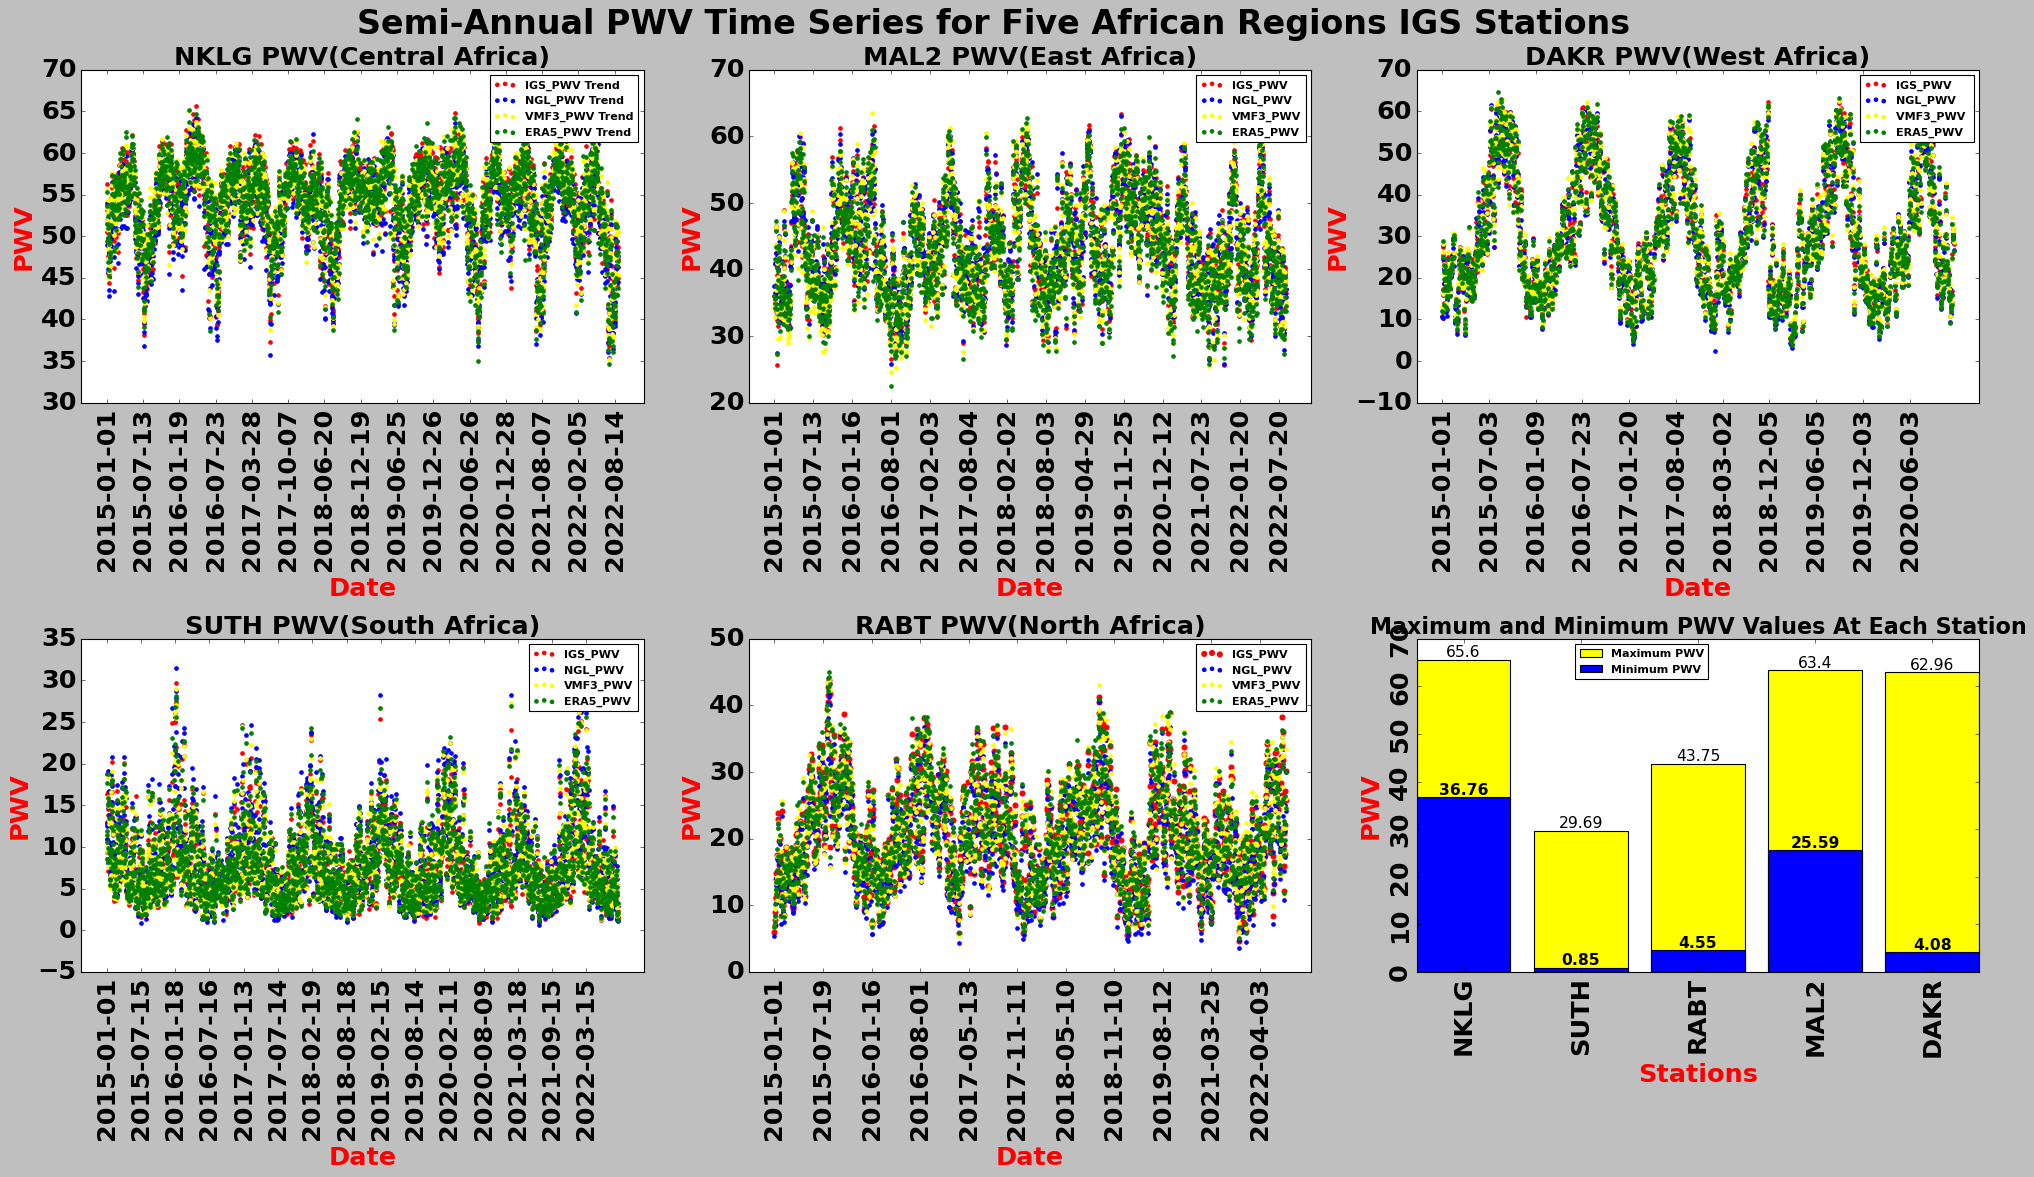

In [83]:
SemiAnnualScatterPlot(data,{"IGS_PWV":"IGS_PWV","NGL_PWV":"NGL_PWV","VMF3_PWV":"VMF3_PWV","ERA5_PWV":"ERA5_PWV"})

In [13]:
 EXTRACTED_STATION_NAME_RABT = Station_Extraction('RABT',data)

In [8]:
 EXTRACTED_STATION_NAME_RABT 

,STN,DOY,YEAR,MONTH,DAY,LAT,LON,H,IGS_PWV,NGL_PWV,VMF3_PWV,ERA5_PWV
date,,,,,,,,,,,,
2015-01-01,RABT,1,2015,1,1,33.998,-6.854,90.1,6.097031,5.385625,6.707605,6.741667
2015-01-02,RABT,2,2015,1,2,33.998,-6.854,90.1,7.165676,6.850417,7.491442,7.479167
2015-01-03,RABT,3,2015,1,3,33.998,-6.854,90.1,7.812014,7.054236,8.266754,8.312500
2015-01-04,RABT,4,2015,1,4,33.998,-6.854,90.1,9.081924,8.314514,9.480331,10.162500
2015-01-05,RABT,5,2015,1,5,33.998,-6.854,90.1,11.118129,10.251944,11.631936,12.391667
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-21,RABT,2790,2022,8,21,33.998,-6.854,90.1,17.635488,17.209410,18.178256,19.850000
2022-08-22,RABT,2791,2022,8,22,33.998,-6.854,90.1,22.035030,21.191701,21.659343,22.245833
2022-08-23,RABT,2792,2022,8,23,33.998,-6.854,90.1,26.847064,25.093924,26.044259,26.445833


In [14]:
 EXTRACTED_STATION_NAME_RABT[( EXTRACTED_STATION_NAME_RABT.index >=  '2019-11-01') & ( EXTRACTED_STATION_NAME_RABT.index <= '2020-12-31')]

,STN,DOY,YEAR,MONTH,DAY,LAT,LON,H,IGS_PWV,NGL_PWV,VMF3_PWV,ERA5_PWV
date,,,,,,,,,,,,
2019-11-01,RABT,1766,2019,11,1,33.998,-6.854,90.1,33.983056,34.871111,36.113253,35.875000
2019-11-02,RABT,1767,2019,11,2,33.998,-6.854,90.1,30.527476,29.665521,31.571045,31.150000
2019-11-03,RABT,1768,2019,11,3,33.998,-6.854,90.1,29.621675,31.152951,31.939039,31.354167
2019-11-04,RABT,1769,2019,11,4,33.998,-6.854,90.1,26.924119,24.947292,26.612331,25.520833
2019-11-05,RABT,1770,2019,11,5,33.998,-6.854,90.1,22.526409,21.725174,23.294423,22.891667
2019-11-06,RABT,1771,2019,11,6,33.998,-6.854,90.1,19.052730,18.260833,18.527516,19.537500
2019-11-07,RABT,1772,2019,11,7,33.998,-6.854,90.1,20.175920,21.916597,24.832943,23.925000
2019-11-08,RABT,1773,2019,11,8,33.998,-6.854,90.1,13.550897,14.538229,15.825961,15.841667
2019-11-09,RABT,1774,2019,11,9,33.998,-6.854,90.1,13.264651,12.805972,14.456432,13.912500


In [15]:
 EXTRACTED_STATION_NAME_RABT

,STN,DOY,YEAR,MONTH,DAY,LAT,LON,H,IGS_PWV,NGL_PWV,VMF3_PWV,ERA5_PWV
date,,,,,,,,,,,,
2015-01-01,RABT,1,2015,1,1,33.998,-6.854,90.1,6.097031,5.385625,6.707605,6.741667
2015-01-02,RABT,2,2015,1,2,33.998,-6.854,90.1,7.165676,6.850417,7.491442,7.479167
2015-01-03,RABT,3,2015,1,3,33.998,-6.854,90.1,7.812014,7.054236,8.266754,8.312500
2015-01-04,RABT,4,2015,1,4,33.998,-6.854,90.1,9.081924,8.314514,9.480331,10.162500
2015-01-05,RABT,5,2015,1,5,33.998,-6.854,90.1,11.118129,10.251944,11.631936,12.391667
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-21,RABT,2790,2022,8,21,33.998,-6.854,90.1,17.635488,17.209410,18.178256,19.850000
2022-08-22,RABT,2791,2022,8,22,33.998,-6.854,90.1,22.035030,21.191701,21.659343,22.245833
2022-08-23,RABT,2792,2022,8,23,33.998,-6.854,90.1,26.847064,25.093924,26.044259,26.445833


In [84]:
def SemiAnnualTrendPlot(data,column_name,number_of_years):
    
    plt.style.use("classic")
    fig, axs = plt.subplots(2, 3,figsize=(25, 15))
    linewidth=1.0

    EXTRACTED_STATION_NAME_NKLG = Station_Extraction('NKLG',data)
    EXTRACTED_STATION_NAME_MAL2 = Station_Extraction('MAL2',data)
    EXTRACTED_STATION_NAME_DAKR = Station_Extraction('DAKR',data)
    EXTRACTED_STATION_NAME_SUTH = Station_Extraction('SUTH',data)
    EXTRACTED_STATION_NAME_RABT = Station_Extraction('RABT',data)
    
    
    NKLG_semi_annual_decomposition_IGS_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_NKLG[column_name['IGS_PWV']], model='additive',period=number_of_years)
    NKLG_semi_annual_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_NKLG[column_name['NGL_PWV']], model='additive',period=number_of_years)
    NKLG_semi_annual_decomposition_VMF3_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_NKLG[column_name['VMF3_PWV']], model='additive',period=number_of_years)
    NKLG_semi_annual_decomposition_ERA5_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_NKLG[column_name['ERA5_PWV']], model='additive',period=number_of_years)

    MAL2_semi_annual_decomposition_IGS_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_MAL2[column_name['IGS_PWV']], model='additive',period=number_of_years)
    MAL2_semi_annual_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_MAL2[column_name['NGL_PWV']], model='additive',period=number_of_years)
    MAL2_semi_annual_decomposition_VMF3_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_MAL2[column_name['VMF3_PWV']], model='additive',period=number_of_years)
    MAL2_semi_annual_decomposition_ERA5_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_MAL2[column_name['ERA5_PWV']], model='additive',period=number_of_years)

    DAKR_semi_annual_decomposition_IGS_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_DAKR[column_name['IGS_PWV']], model='additive',period=number_of_years)
    DAKR_semi_annual_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_DAKR[column_name['NGL_PWV']], model='additive',period=number_of_years)
    DAKR_semi_annual_decomposition_VMF3_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_DAKR[column_name['VMF3_PWV']], model='additive',period=number_of_years)
    DAKR_semi_annual_decomposition_ERA5_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_DAKR[column_name['ERA5_PWV']], model='additive',period=number_of_years)

    SUTH_semi_annual_decomposition_IGS_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_SUTH[column_name['IGS_PWV']], model='additive',period=number_of_years)
    SUTH_semi_annual_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_SUTH[column_name['NGL_PWV']], model='additive',period=number_of_years)
    SUTH_semi_annual_decomposition_VMF3_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_SUTH[column_name['VMF3_PWV']], model='additive',period=number_of_years)
    SUTH_semi_annual_decomposition_ERA5_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_SUTH[column_name['ERA5_PWV']], model='additive',period=number_of_years)

    RABT_semi_annual_decomposition_IGS_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_RABT[column_name['IGS_PWV']], model='additive',period=number_of_years)
    RABT_semi_annual_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_RABT[column_name['NGL_PWV']], model='additive',period=number_of_years)
    RABT_semi_annual_decomposition_VMF3_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_RABT[column_name['VMF3_PWV']], model='additive',period=number_of_years)
    RABT_semi_annual_decomposition_ERA5_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_RABT[column_name['ERA5_PWV']], model='additive',period=number_of_years)

    axs[0,0].plot(NKLG_semi_annual_decomposition_IGS_PWV.trend.index, NKLG_semi_annual_decomposition_IGS_PWV.trend,color='red',label = 'IGS_PWV Trend',linewidth=linewidth)
    axs[0,0].plot(NKLG_semi_annual_decomposition_NGL_PWV.trend.index, NKLG_semi_annual_decomposition_NGL_PWV.trend,color='blue',label = 'NGL_PWV Trend',linewidth=linewidth)
    axs[0,0].plot(NKLG_semi_annual_decomposition_VMF3_PWV.trend.index, NKLG_semi_annual_decomposition_VMF3_PWV.trend,color='yellow',label = 'VMF3_PWV Trend',linewidth=linewidth)
    axs[0,0].plot(NKLG_semi_annual_decomposition_ERA5_PWV.trend.index, NKLG_semi_annual_decomposition_ERA5_PWV.trend,color='green',label = 'ERA5_PWV Trend',linewidth=linewidth)
    axs[0,0].set_title('NKLG Trend(Central Africa)',fontsize = 23,fontweight ="bold")
    axs[0,0].set_ylabel('Semi-Anual Trend',fontsize = 23,fontweight ="bold",color="red")
    axs[0,0].set_xlabel('Date',fontsize = 23,fontweight ="bold",color="red")
    axs[0,0].legend(prop=font,loc='lower center', bbox_to_anchor=(0.2, 0))
    NKLG_tick_years = EXTRACTED_STATION_NAME_NKLG.index[0::177]
    NKLG_labels =NKLG_tick_years   
    axs[0,0].set_xticks(NKLG_tick_years)
    axs[0,0].set_xticklabels(NKLG_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[0,0].get_yticklabels(), rotation=45,fontsize = 23,fontweight ="bold")
   

    axs[0,1].plot(MAL2_semi_annual_decomposition_IGS_PWV.trend.index, MAL2_semi_annual_decomposition_IGS_PWV.trend,color='red',label = 'IGS_PWV Trend',linewidth=linewidth)
    axs[0,1].plot(MAL2_semi_annual_decomposition_NGL_PWV.trend.index, MAL2_semi_annual_decomposition_NGL_PWV.trend,color='blue',label = 'NGL_PWV Trend',linewidth=linewidth)
    axs[0,1].plot(MAL2_semi_annual_decomposition_VMF3_PWV.trend.index, MAL2_semi_annual_decomposition_VMF3_PWV.trend,color='yellow',label = 'VMF3_PWV Trend',linewidth=linewidth)
    axs[0,1].plot(MAL2_semi_annual_decomposition_ERA5_PWV.trend.index, MAL2_semi_annual_decomposition_ERA5_PWV.trend,color='green',label = 'ERA5_PWV Trend',linewidth=linewidth)
    axs[0,1].set_title('MAL2 Trend(East Africa)',fontsize = 23,fontweight ="bold")
    axs[0,1].set_ylabel('Semi-Anual Trend',fontsize = 23,fontweight ="bold",color="red")
    axs[0,1].set_xlabel('Date',fontsize = 23,fontweight ="bold",color="red")
    axs[0,1].legend(prop=font,loc='upper center')
    MAL2_tick_years = EXTRACTED_STATION_NAME_MAL2.index[0::177]
    MAL2_labels =MAL2_tick_years   
    axs[0,1].set_xticks(MAL2_tick_years)
    axs[0,1].set_xticklabels(MAL2_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[0,1].get_yticklabels(), rotation=45,fontsize = 23,fontweight ="bold")

    axs[0,2].plot(DAKR_semi_annual_decomposition_IGS_PWV.trend.index, DAKR_semi_annual_decomposition_IGS_PWV.trend,color='red',label = 'IGS_PWV Trend',linewidth=linewidth)
    axs[0,2].plot(DAKR_semi_annual_decomposition_NGL_PWV.trend.index, DAKR_semi_annual_decomposition_NGL_PWV.trend,color='blue',label = 'NGL_PWV Trend',linewidth=linewidth)
    axs[0,2].plot(DAKR_semi_annual_decomposition_VMF3_PWV.trend.index, DAKR_semi_annual_decomposition_VMF3_PWV.trend,color='yellow',label = 'VMF3_PWV Trend',linewidth=linewidth)
    axs[0,2].plot(DAKR_semi_annual_decomposition_ERA5_PWV.trend.index, DAKR_semi_annual_decomposition_ERA5_PWV.trend,color='green',label = 'ERA5_PWV Trend',linewidth=linewidth)
    axs[0,2].set_title('DAKR Trend(West Africa)',fontsize = 23,fontweight ="bold")
    axs[0,2].set_ylabel('Semi-Anual Trend',fontsize = 23,fontweight ="bold",color="red")
    axs[0,2].set_xlabel('Date',fontsize = 23,fontweight ="bold",color="red")
    axs[0,2].legend(prop=font,loc='lower left', bbox_to_anchor=(0, 0))
    DAKR_tick_years = EXTRACTED_STATION_NAME_DAKR.index[0::177]
    DAKR_labels =DAKR_tick_years   
    axs[0,2].set_xticks(DAKR_tick_years)
    axs[0,2].set_xticklabels(DAKR_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[0,2].get_yticklabels(), rotation=45,fontsize = 23,fontweight ="bold")

    axs[1,0].plot(SUTH_semi_annual_decomposition_IGS_PWV.trend.index, SUTH_semi_annual_decomposition_IGS_PWV.trend,color='red',label = 'IGS_PWV Trend',linewidth=linewidth)
    axs[1,0].plot(SUTH_semi_annual_decomposition_NGL_PWV.trend.index, SUTH_semi_annual_decomposition_NGL_PWV.trend,color='blue',label = 'NGL_PWV Trend',linewidth=linewidth)
    axs[1,0].plot(SUTH_semi_annual_decomposition_VMF3_PWV.trend.index, SUTH_semi_annual_decomposition_VMF3_PWV.trend,color='yellow',label = 'VMF3_PWV Trend',linewidth=linewidth)
    axs[1,0].plot(SUTH_semi_annual_decomposition_ERA5_PWV.trend.index, SUTH_semi_annual_decomposition_ERA5_PWV.trend,color='green',label = 'ERA5_PWV Trend',linewidth=linewidth)
    axs[1,0].set_title('SUTH Trend(South Africa)',fontsize = 23,fontweight ="bold")
    axs[1,0].set_ylabel('Semi-Anual Trend',fontsize = 23,fontweight ="bold",color="red")
    axs[1,0].set_xlabel('Date',fontsize = 23,fontweight ="bold",color="red")
    axs[1,0].legend(prop=font,loc='lower left', bbox_to_anchor=(0, 0))
    SUTH_tick_years = EXTRACTED_STATION_NAME_SUTH.index[0::177]
    SUTH_labels =SUTH_tick_years   
    axs[1,0].set_xticks(SUTH_tick_years)
    axs[1,0].set_xticklabels(SUTH_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[1,0].get_yticklabels(), rotation=45,fontsize = 23,fontweight ="bold")

    axs[1,1].plot(RABT_semi_annual_decomposition_IGS_PWV.trend.index, RABT_semi_annual_decomposition_IGS_PWV.trend,color='red',label = 'IGS_PWV Trend',linewidth=linewidth)
    axs[1,1].plot(RABT_semi_annual_decomposition_NGL_PWV.trend.index, RABT_semi_annual_decomposition_NGL_PWV.trend,color='blue',label = 'NGL_PWV Trend',linewidth=linewidth)
    axs[1,1].plot(RABT_semi_annual_decomposition_VMF3_PWV.trend.index, RABT_semi_annual_decomposition_VMF3_PWV.trend,color='yellow',label = 'VMF3_PWV Trend',linewidth=linewidth)
    axs[1,1].plot(RABT_semi_annual_decomposition_ERA5_PWV.trend.index, RABT_semi_annual_decomposition_ERA5_PWV.trend,color='green',label = 'ERA5_PWV Trend',linewidth=linewidth)
    axs[1,1].set_title('RABT Trend(North Africa)',fontsize = 23,fontweight ="bold")
    axs[1,1].set_ylabel('Semi-Anual Trend',fontsize = 23,fontweight ="bold",color="red")
    axs[1,1].set_xlabel('Date',fontsize = 23,fontweight ="bold",color="red")
    axs[1,1].legend(prop=font,loc='upper center')
    RABT_tick_years = EXTRACTED_STATION_NAME_RABT.index[0::177]
    RABT_labels =RABT_tick_years   
    axs[1,1].set_xticks(RABT_tick_years)
    axs[1,1].set_xticklabels(RABT_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[1,1].get_yticklabels(), rotation=45,fontsize = 23,fontweight ="bold")

    igs_max_trend = [NKLG_semi_annual_decomposition_IGS_PWV.trend.max(),SUTH_semi_annual_decomposition_IGS_PWV.trend.max(),RABT_semi_annual_decomposition_IGS_PWV.trend.max(),MAL2_semi_annual_decomposition_IGS_PWV.trend.max(),DAKR_semi_annual_decomposition_IGS_PWV.trend.max()]
    igs_min_trend = [NKLG_semi_annual_decomposition_IGS_PWV.trend.min(),SUTH_semi_annual_decomposition_IGS_PWV.trend.min(),RABT_semi_annual_decomposition_IGS_PWV.trend.min(),MAL2_semi_annual_decomposition_IGS_PWV.trend.min(),DAKR_semi_annual_decomposition_IGS_PWV.trend.min()]
    igs_stations = ['NKLG','SUTH','RABT','MAL2','DAKR']
    axs[1,2].bar(igs_stations, igs_max_trend,color='yellow',linewidth=linewidth,label = "Maximum Trend")
    axs[1,2].bar(igs_stations, igs_min_trend,color='blue',linewidth=linewidth,label = "Minimum Trend")
    axs[1,2].set_title('Maximum and Minimum Trend Values At Each Station',fontsize = 20,fontweight ="bold")
    axs[1,2].set_ylabel('Trend Values',fontsize = 23,fontweight ="bold",color="red")
    axs[1,2].set_xlabel('Stations',fontsize = 23,fontweight ="bold",color="red")
    axs[1,2].legend(prop=font)
    plt.setp(axs[1,2].get_xticklabels(), rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[1,2].get_yticklabels(), rotation=90,fontsize = 23,fontweight ="bold")

    for index,value in enumerate(igs_max_trend):
        axs[1, 2].text(index, value, str(round(value,2)),ha='center', va='bottom',fontsize=14,fontweight ="bold",color='black') 
        
    for index,value in enumerate(igs_min_trend):
        axs[1, 2].text(index, value, str(round(value,2)),ha='center', va='bottom',fontsize=14,fontweight ="bold",color='black') 

    # for ax in axs.flat[:-1]:
    #     ax.xaxis.set_major_locator(mdates.DayLocator(interval=177))
    #     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.7, wspace=0.3)
    fig.suptitle('Semi-Annual Trend Analysis for Five African Regions IGS Stations',fontsize = 30,fontweight ="bold")
    plt.tight_layout()
    

    # plt.savefig('SemiAnnualTrend1.jpg',dpi=500)
    # fig.canvas.draw()
    # buf = fig.canvas.tostring_rgb()
    # width, height = fig.canvas.get_width_height()
    # pil_image = Image.frombytes("RGB", (width, height), buf)
     
    # # Save PIL Image as PNG
    # pil_image.save('pil_image_save.png')
    

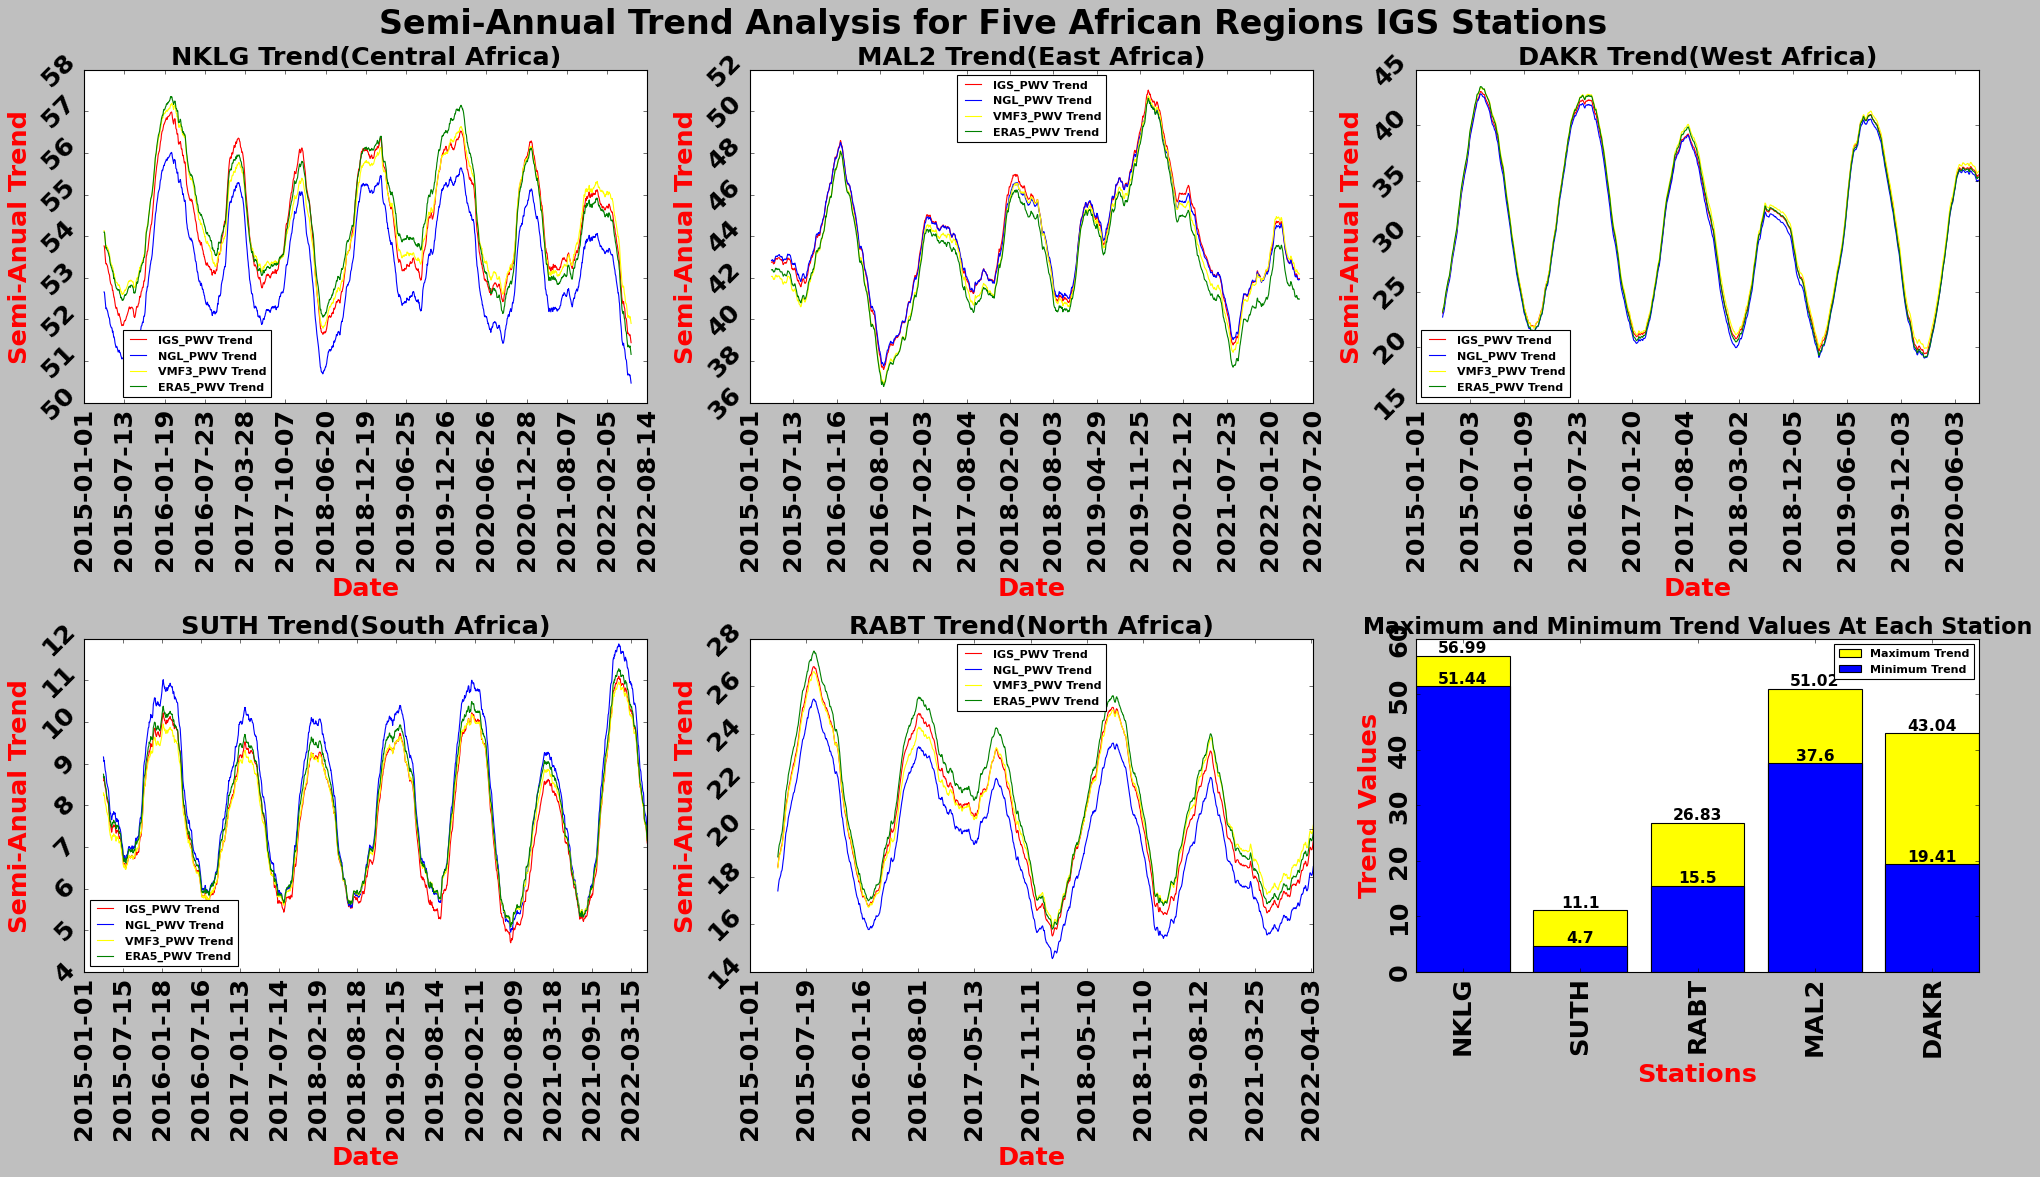

In [85]:
SemiAnnualTrendPlot(data,{"IGS_PWV":"IGS_PWV","NGL_PWV":"NGL_PWV","VMF3_PWV":"VMF3_PWV","ERA5_PWV":"ERA5_PWV"},177)

In [ ]:

# plt.xticklabels(labels, rotation=45)

In [78]:
def InterAnnualTrendPlot(data,column_name,number_of_years):
    
    plt.style.use("classic")
    fig, axs = plt.subplots(2, 3,figsize=(25, 15))
    linewidth=1.0

    EXTRACTED_STATION_NAME_NKLG = Station_Extraction('NKLG',data)
    EXTRACTED_STATION_NAME_MAL2 = Station_Extraction('MAL2',data)
    EXTRACTED_STATION_NAME_DAKR = Station_Extraction('DAKR',data)
    EXTRACTED_STATION_NAME_SUTH = Station_Extraction('SUTH',data)
    EXTRACTED_STATION_NAME_RABT = Station_Extraction('RABT',data)

    NKLG_inter_annual_decomposition_IGS_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_NKLG[column_name['IGS_PWV']], model='additive',period=number_of_years)
    NKLG_inter_annual_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_NKLG[column_name['NGL_PWV']], model='additive',period=number_of_years)
    NKLG_inter_annual_decomposition_VMF3_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_NKLG[column_name['VMF3_PWV']], model='additive',period=number_of_years)
    NKLG_inter_annual_decomposition_ERA5_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_NKLG[column_name['ERA5_PWV']], model='additive',period=number_of_years)

    MAL2_inter_annual_decomposition_IGS_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_MAL2[column_name['IGS_PWV']], model='additive',period=number_of_years)
    MAL2_inter_annual_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_MAL2[column_name['NGL_PWV']], model='additive',period=number_of_years)
    MAL2_inter_annual_decomposition_VMF3_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_MAL2[column_name['VMF3_PWV']], model='additive',period=number_of_years)
    MAL2_inter_annual_decomposition_ERA5_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_MAL2[column_name['ERA5_PWV']], model='additive',period=number_of_years)

    DAKR_inter_annual_decomposition_IGS_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_DAKR[column_name['IGS_PWV']], model='additive',period=number_of_years)
    DAKR_inter_annual_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_DAKR[column_name['NGL_PWV']], model='additive',period=number_of_years)
    DAKR_inter_annual_decomposition_VMF3_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_DAKR[column_name['VMF3_PWV']], model='additive',period=number_of_years)
    DAKR_inter_annual_decomposition_ERA5_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_DAKR[column_name['ERA5_PWV']], model='additive',period=number_of_years)

    SUTH_inter_annual_decomposition_IGS_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_SUTH[column_name['IGS_PWV']], model='additive',period=number_of_years)
    SUTH_inter_annual_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_SUTH[column_name['NGL_PWV']], model='additive',period=number_of_years)
    SUTH_inter_annual_decomposition_VMF3_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_SUTH[column_name['VMF3_PWV']], model='additive',period=number_of_years)
    SUTH_inter_annual_decomposition_ERA5_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_SUTH[column_name['ERA5_PWV']], model='additive',period=number_of_years)

    RABT_inter_annual_decomposition_IGS_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_RABT[column_name['IGS_PWV']], model='additive',period=number_of_years)
    RABT_inter_annual_decomposition_NGL_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_RABT[column_name['NGL_PWV']], model='additive',period=number_of_years)
    RABT_inter_annual_decomposition_VMF3_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_RABT[column_name['VMF3_PWV']], model='additive',period=number_of_years)
    RABT_inter_annual_decomposition_ERA5_PWV = sm.tsa.seasonal_decompose(EXTRACTED_STATION_NAME_RABT[column_name['ERA5_PWV']], model='additive',period=number_of_years)

    axs[0,0].plot(NKLG_inter_annual_decomposition_IGS_PWV.trend.index, NKLG_inter_annual_decomposition_IGS_PWV.trend,color='red',label = 'IGS_PWV Trend',linewidth=linewidth)
    axs[0,0].plot(NKLG_inter_annual_decomposition_NGL_PWV.trend.index, NKLG_inter_annual_decomposition_NGL_PWV.trend,color='blue',label = 'NGL_PWV Trend',linewidth=linewidth)
    axs[0,0].plot(NKLG_inter_annual_decomposition_VMF3_PWV.trend.index, NKLG_inter_annual_decomposition_VMF3_PWV.trend,color='yellow',label = 'VMF3_PWV Trend',linewidth=linewidth)
    axs[0,0].plot(NKLG_inter_annual_decomposition_ERA5_PWV.trend.index, NKLG_inter_annual_decomposition_ERA5_PWV.trend,color='green',label = 'ERA5_PWV Trend',linewidth=linewidth)
    axs[0,0].set_title('NKLG Trend(Central Africa)',fontsize = 23,fontweight ="bold")
    axs[0,0].set_ylabel('InterAnual Trend',fontsize = 23,fontweight ="bold",color = 'red')
    axs[0,0].set_xlabel('Date',fontsize = 23,fontweight ="bold",color = 'red')
    axs[0,0].legend(prop = font)
    NKLG_tick_years = EXTRACTED_STATION_NAME_NKLG.index[0::355]
    NKLG_labels =NKLG_tick_years   
    axs[0,0].set_xticks(NKLG_tick_years)
    axs[0,0].set_xticklabels(NKLG_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[0,1].get_yticklabels(), rotation=45,fontsize = 23,fontweight ="bold")
 
 

    axs[0,1].plot(MAL2_inter_annual_decomposition_IGS_PWV.trend.index, MAL2_inter_annual_decomposition_IGS_PWV.trend,color='red',label = 'IGS_PWV Trend',linewidth=linewidth)
    axs[0,1].plot(MAL2_inter_annual_decomposition_NGL_PWV.trend.index, MAL2_inter_annual_decomposition_NGL_PWV.trend,color='blue',label = 'NGL_PWV Trend',linewidth=linewidth)
    axs[0,1].plot(MAL2_inter_annual_decomposition_VMF3_PWV.trend.index, MAL2_inter_annual_decomposition_VMF3_PWV.trend,color='yellow',label = 'VMF3_PWV Trend',linewidth=linewidth)
    axs[0,1].plot(MAL2_inter_annual_decomposition_ERA5_PWV.trend.index, MAL2_inter_annual_decomposition_ERA5_PWV.trend,color='green',label = 'ERA5_PWV Trend',linewidth=linewidth)
    axs[0,1].set_title('MAL2 Trend(East Africa)',fontsize = 23,fontweight ="bold")
    axs[0,1].set_ylabel('InterAnual Trend',fontsize = 23,fontweight ="bold",color = 'red')
    axs[0,1].set_xlabel('Date',fontsize = 23,fontweight ="bold",color = 'red')
    axs[0,1].legend(prop = font,loc='upper center')
    MAL2_tick_years = EXTRACTED_STATION_NAME_MAL2.index[0::355]
    MAL2_labels =MAL2_tick_years   
    axs[0,1].set_xticks(MAL2_tick_years)
    axs[0,1].set_xticklabels(MAL2_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[0,1].get_yticklabels(), rotation=45,fontsize = 23,fontweight ="bold")

    axs[0,2].plot(DAKR_inter_annual_decomposition_IGS_PWV.trend.index, DAKR_inter_annual_decomposition_IGS_PWV.trend,color='red',label = 'IGS_PWV Trend',linewidth=linewidth)
    axs[0,2].plot(DAKR_inter_annual_decomposition_NGL_PWV.trend.index, DAKR_inter_annual_decomposition_NGL_PWV.trend,color='blue',label = 'NGL_PWV Trend',linewidth=linewidth)
    axs[0,2].plot(DAKR_inter_annual_decomposition_VMF3_PWV.trend.index, DAKR_inter_annual_decomposition_VMF3_PWV.trend,color='yellow',label = 'VMF3_PWV Trend',linewidth=linewidth)
    axs[0,2].plot(DAKR_inter_annual_decomposition_ERA5_PWV.trend.index, DAKR_inter_annual_decomposition_ERA5_PWV.trend,color='green',label = 'ERA5_PWV Trend',linewidth=linewidth)
    axs[0,2].set_title('DAKR Trend(West Africa)',fontsize = 23,fontweight ="bold")
    axs[0,2].set_ylabel('InterAnual Trend',fontsize = 23,fontweight ="bold",color = 'red')
    axs[0,2].set_xlabel('Date',fontsize = 23,fontweight ="bold",color = 'red')
    axs[0,2].legend(prop = font)
    DAKR_tick_years = EXTRACTED_STATION_NAME_DAKR.index[0::355]
    DAKR_labels =DAKR_tick_years   
    axs[0,2].set_xticks(DAKR_tick_years)
    axs[0,2].set_xticklabels(DAKR_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[0,2].get_yticklabels(), rotation=45,fontsize = 23,fontweight ="bold")

    axs[1,0].plot(SUTH_inter_annual_decomposition_IGS_PWV.trend.index, SUTH_inter_annual_decomposition_IGS_PWV.trend,color='red',label = 'IGS_PWV Trend',linewidth=linewidth)
    axs[1,0].plot(SUTH_inter_annual_decomposition_NGL_PWV.trend.index, SUTH_inter_annual_decomposition_NGL_PWV.trend,color='blue',label = 'NGL_PWV Trend',linewidth=linewidth)
    axs[1,0].plot(SUTH_inter_annual_decomposition_VMF3_PWV.trend.index, SUTH_inter_annual_decomposition_VMF3_PWV.trend,color='yellow',label = 'VMF3_PWV Trend',linewidth=linewidth)
    axs[1,0].plot(SUTH_inter_annual_decomposition_ERA5_PWV.trend.index, SUTH_inter_annual_decomposition_ERA5_PWV.trend,color='green',label = 'ERA5_PWV Trend',linewidth=linewidth)
    axs[1,0].set_title('SUTH Trend(South Africa)',fontsize = 23,fontweight ="bold")
    axs[1,0].set_ylabel('InterAnual Trend',fontsize = 23,fontweight ="bold",color = 'red')
    axs[1,0].set_xlabel('Date',fontsize = 23,fontweight ="bold",color = 'red')
    axs[1,0].legend(prop = font,loc='upper center')
    SUTH_tick_years = EXTRACTED_STATION_NAME_SUTH.index[0::355]
    SUTH_labels =SUTH_tick_years   
    axs[1,0].set_xticks(SUTH_tick_years)
    axs[1,0].set_xticklabels(SUTH_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[1,0].get_yticklabels(), rotation=45,fontsize = 23,fontweight ="bold")
    

    axs[1,1].plot(RABT_inter_annual_decomposition_IGS_PWV.trend.index, RABT_inter_annual_decomposition_IGS_PWV.trend,color='red',label = 'IGS_PWV Trend',linewidth=linewidth)
    axs[1,1].plot(RABT_inter_annual_decomposition_NGL_PWV.trend.index, RABT_inter_annual_decomposition_NGL_PWV.trend,color='blue',label = 'NGL_PWV Trend',linewidth=linewidth)
    axs[1,1].plot(RABT_inter_annual_decomposition_VMF3_PWV.trend.index, RABT_inter_annual_decomposition_VMF3_PWV.trend,color='yellow',label = 'VMF3_PWV Trend',linewidth=linewidth)
    axs[1,1].plot(RABT_inter_annual_decomposition_ERA5_PWV.trend.index, RABT_inter_annual_decomposition_ERA5_PWV.trend,color='green',label = 'ERA5_PWV Trend',linewidth=linewidth)
    axs[1,1].set_title('RABT Trend(North Africa)',fontsize = 23,fontweight ="bold")
    axs[1,1].set_ylabel('InterAnual Trend',fontsize = 23,fontweight ="bold",color = 'red')
    axs[1,1].set_xlabel('Date',fontsize = 23,fontweight ="bold",color = 'red')
    axs[1,1].legend(prop = font)
    RABT_tick_years = EXTRACTED_STATION_NAME_RABT.index[0::355]
    RABT_labels =RABT_tick_years   
    axs[1,1].set_xticks(RABT_tick_years)
    axs[1,1].set_xticklabels(RABT_labels, rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[1,2].get_yticklabels(), rotation=45,fontsize = 23,fontweight ="bold")   
    
    igs_max_trend = [NKLG_inter_annual_decomposition_IGS_PWV.trend.max(),SUTH_inter_annual_decomposition_IGS_PWV.trend.max(),RABT_inter_annual_decomposition_IGS_PWV.trend.max(),MAL2_inter_annual_decomposition_IGS_PWV.trend.max(),DAKR_inter_annual_decomposition_IGS_PWV.trend.max()]
    igs_min_trend = [NKLG_inter_annual_decomposition_IGS_PWV.trend.min(),SUTH_inter_annual_decomposition_IGS_PWV.trend.min(),RABT_inter_annual_decomposition_IGS_PWV.trend.min(),MAL2_inter_annual_decomposition_IGS_PWV.trend.min(),DAKR_inter_annual_decomposition_IGS_PWV.trend.min()]
    igs_stations = ['NKLG','SUTH','RABT','MAL2','DAKR']
    axs[1,2].bar(igs_stations, igs_max_trend,color='yellow',linewidth=linewidth,label = "Maximum Trend")
    axs[1,2].bar(igs_stations, igs_min_trend,color='blue',linewidth=linewidth,label = "Minimum Trend")
    axs[1,2].set_title('Maximum and Minimum Trend Values At Each Station',fontsize = 20,fontweight ="bold")
    axs[1,2].set_ylabel('InterAnnual Trend',fontsize = 23,fontweight ="bold",color = 'red')
    axs[1,2].set_xlabel('Stations',fontsize = 23,fontweight ="bold",color = 'red')
    axs[1,2].legend(prop = font)
    plt.setp(axs[1,2].get_xticklabels(), rotation=90,fontsize = 23,fontweight ="bold")
    plt.setp(axs[1,2].get_yticklabels(), rotation=90,fontsize = 23,fontweight ="bold")

    for index,value in enumerate(igs_max_trend):
        axs[1, 2].text(index, value, str(round(value,2)),ha='center', va='bottom',fontsize=14,color='black') 
        
    for index,value in enumerate(igs_min_trend):
        axs[1, 2].text(index, value, str(round(value,2)),ha='center', va='bottom',fontsize=14,color='black') 
    
    
    fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.7, wspace=0.3)
    fig.suptitle('InterAnnual Trend Analysis for Five African Regions IGS Stations',fontsize = 30,fontweight ="bold")
    # plt.savefig('InterAnnualTrend.jpg',dpi=500)
    plt.tight_layout()
    # fig.canvas.draw()
    # buf = fig.canvas.tostring_rgb()
    # width, height = fig.canvas.get_width_height()
    # pil_image = Image.frombytes("RGB", (width, height), buf)
     
    # # Save PIL Image as PNG
    # pil_image.save('pil_image_save.png')
    

In [79]:
data = combine_all_stations(appending_files_folder=r"C:\Users\aborg\Downloads\NGL\PWVs\IGS_ZTD & ERA5_P & GTROP_Tm\PWV_DAILY")

In [80]:
data

,STN,DOY,YEAR,MONTH,DAY,LAT,LON,H,IGS_PWV,NGL_PWV,VMF3_PWV,ERA5_PWV
date,,,,,,,,,,,,
2015-01-01,ABPO,1,2015,1,1,-19.018,47.229,1552.992,33.427499,33.899306,34.687200,34.320833
2015-01-02,ABPO,2,2015,1,2,-19.018,47.229,1552.992,36.077243,36.190139,36.513681,37.062500
2015-01-03,ABPO,3,2015,1,3,-19.018,47.229,1552.992,37.937256,38.369549,38.741982,37.925000
2015-01-04,ABPO,4,2015,1,4,-19.018,47.229,1552.992,39.099472,38.443229,37.607103,39.508333
2015-01-05,ABPO,5,2015,1,5,-19.018,47.229,1552.992,38.183576,38.250937,37.226597,38.283333
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-26,ZAMB,2795,2022,8,26,-15.426,28.311,1324.914,12.739325,13.450139,11.814464,13.250000
2022-08-27,ZAMB,2796,2022,8,27,-15.426,28.311,1324.914,11.316960,12.036563,10.858125,11.970833
2022-08-28,ZAMB,2797,2022,8,28,-15.426,28.311,1324.914,11.113050,11.016458,10.746267,9.895833


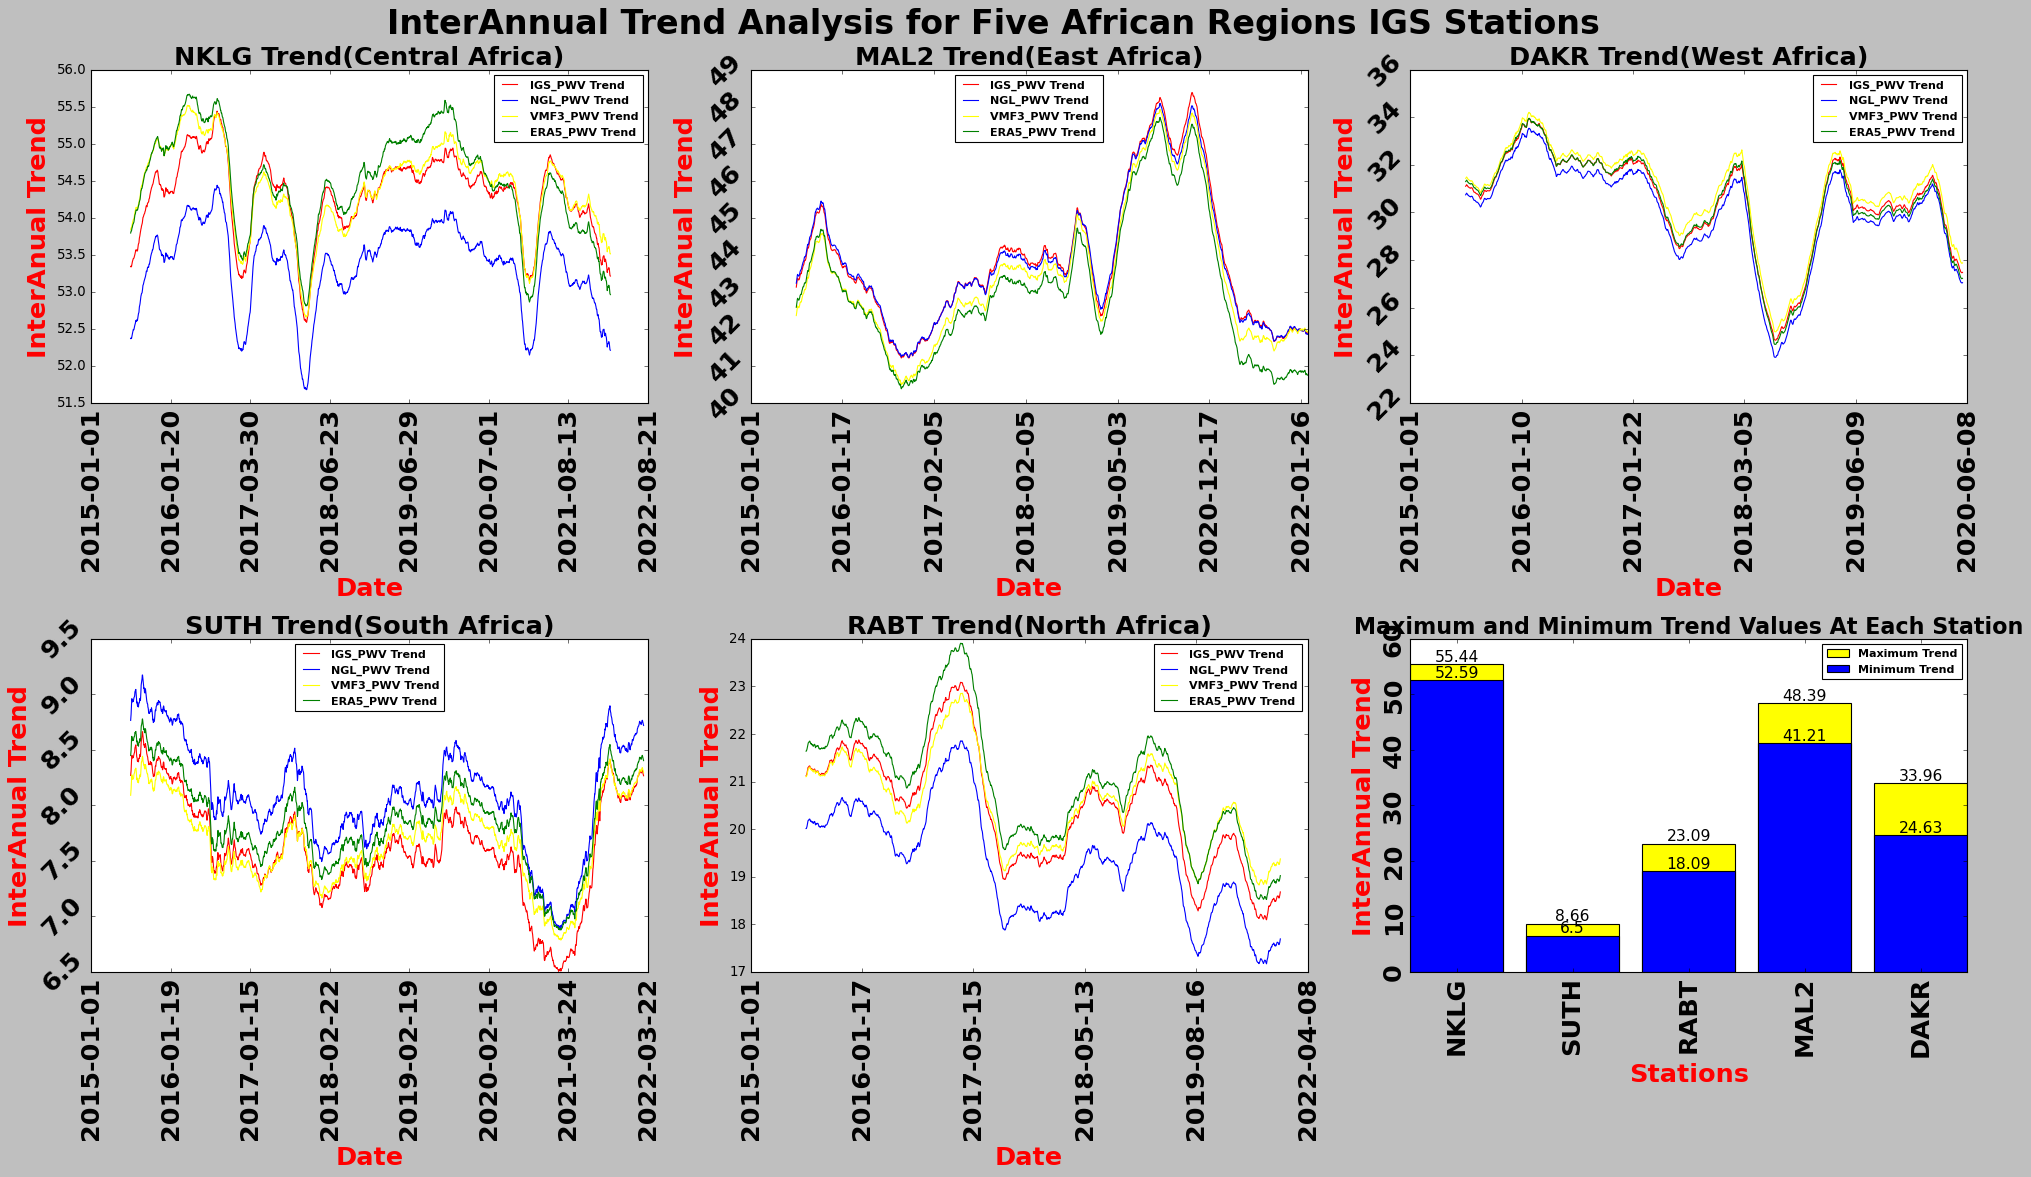

In [81]:
InterAnnualTrendPlot(data,{"IGS_PWV":"IGS_PWV","NGL_PWV":"NGL_PWV","VMF3_PWV":"VMF3_PWV","ERA5_PWV":"ERA5_PWV"},355)

In [40]:
NKLG_STATION1 = Station_Extraction('MAL2',data)

C:\Users\aborg\AppData\Local\Temp\ipykernel_12224\3738368692.py:40: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  buf = fig.canvas.tostring_rgb()


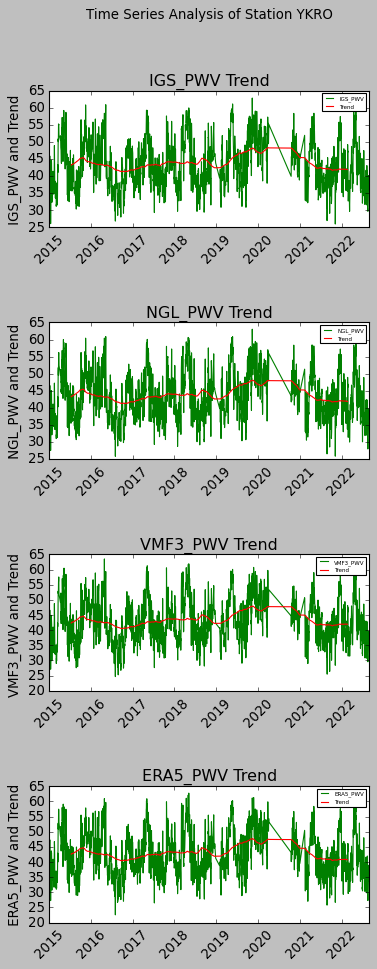

In [41]:
SingleTrendCombinedPlot(NKLG_STATION1,{"IGS_PWV":"IGS_PWV","NGL_PWV":"NGL_PWV","VMF3_PWV":"VMF3_PWV","ERA5_PWV":"ERA5_PWV"},"YKRO",355)

In [58]:
SinglePlot(NKLG_STATION,{"IGS_PWV":"IGS_PWV","NGL_PWV":"NGL_PWV","VMF3_PWV":"VMF3_PWV","ERA5_PWV":"ERA5_PWV"},2020,"NKLG")

NameError: name 'SinglePlot' is not defined

In [18]:
RABT_STATION = Station_Extraction('RABT',data)

In [19]:
RABT_STATION

,STN,DOY,YEAR,MONTH,DAY,LAT,LON,H,IGS_PWV,NGL_PWV,VMF3_PWV,ERA5_PWV
date,,,,,,,,,,,,
2018-01-01,RABT,1097,2018,1,1,33.998,-6.854,90.1,0.010836,0.008999,0.011688,0.010808
2018-01-02,RABT,1098,2018,1,2,33.998,-6.854,90.1,0.010657,0.007772,0.008521,0.008512
2018-01-03,RABT,1099,2018,1,3,33.998,-6.854,90.1,0.017685,0.017321,0.018672,0.017696
2018-01-04,RABT,1100,2018,1,4,33.998,-6.854,90.1,0.014304,0.013716,0.016365,0.015792
2018-01-05,RABT,1101,2018,1,5,33.998,-6.854,90.1,0.013690,0.012809,0.013001,0.014092
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,RABT,1456,2018,12,26,33.998,-6.854,90.1,0.007850,0.007251,0.008024,0.008354
2018-12-27,RABT,1457,2018,12,27,33.998,-6.854,90.1,0.010586,0.009042,0.010168,0.010046
2018-12-28,RABT,1458,2018,12,28,33.998,-6.854,90.1,0.014325,0.013832,0.014956,0.013413


348
348


ValueError: x must have 2 complete cycles requires 350 observations. x only has 348 observation(s)

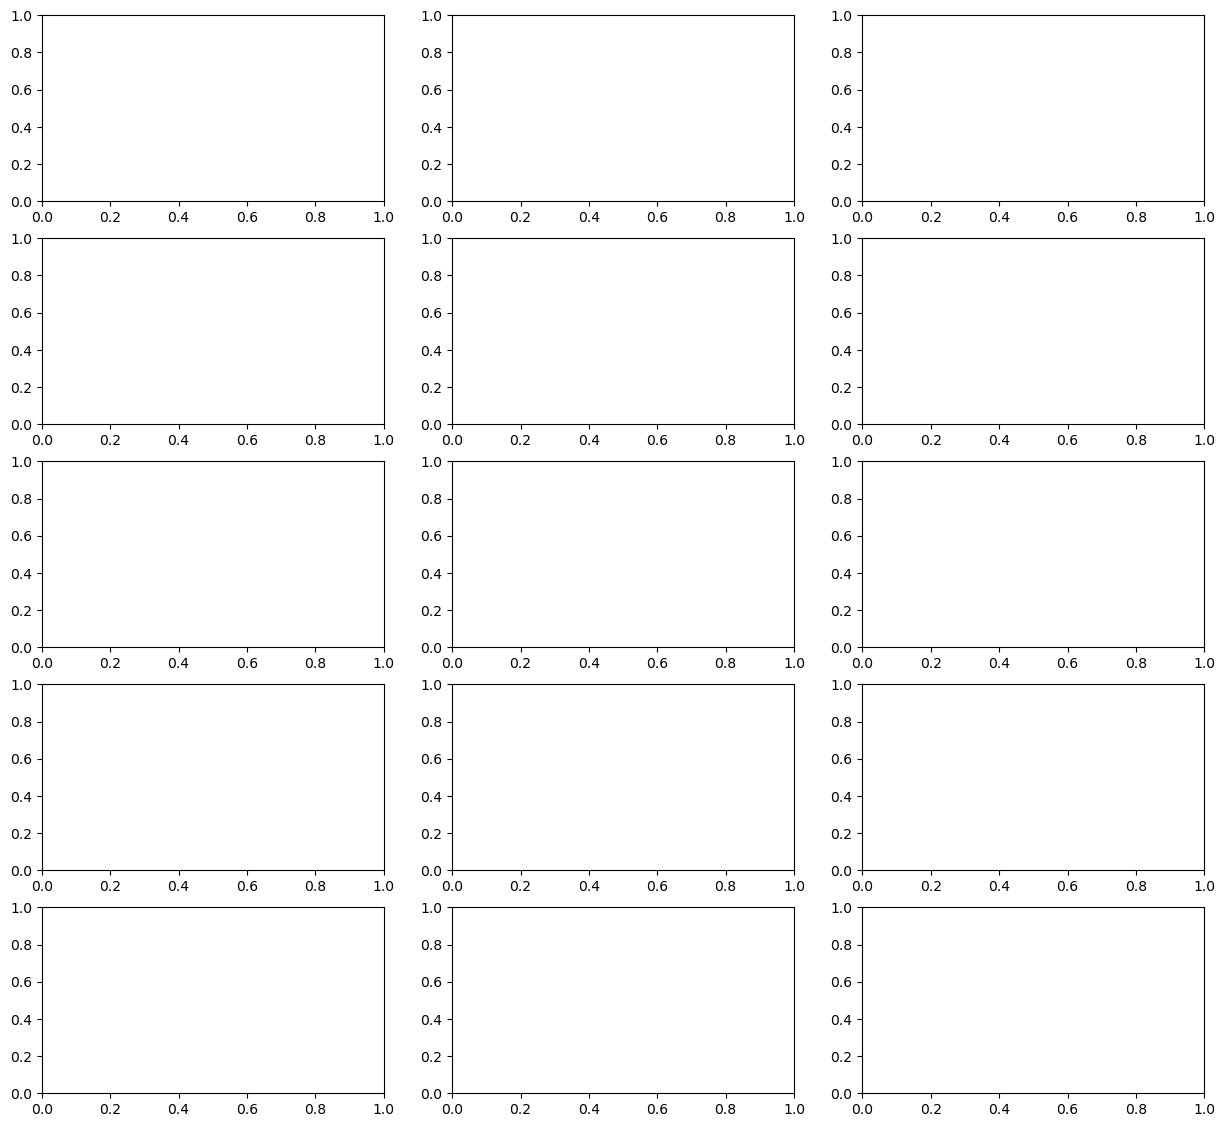

In [20]:
SinglePlot(RABT_STATION,{"IGS_PWV":"IGS_PWV","NGL_PWV":"NGL_PWV","VMF3_PWV":"VMF3_PWV","ERA5_PWV":"ERA5_PWV"},2018,"RABT")

In [ ]:
YKRO_STATION = Station_Extraction('YKRO',data)

In [ ]:
YKRO_STATION

In [ ]:
SinglePlot(YKRO_STATION,{"IGS_PWV":"IGS_PWV","NGL_PWV":"NGL_PWV","VMF3_PWV":"VMF3_PWV","ERA5_PWV":"ERA5_PWV"},2015,"YKRO")

In [ ]:
TDOU_STATION = Station_Extraction('TDOU',data)

In [ ]:
SinglePlot(TDOU_STATION,{"IGS_PWV":"IGS_PWV","NGL_PWV":"NGL_PWV","VMF3_PWV":"VMF3_PWV","ERA5_PWV":"ERA5_PWV"},2015,"TDOU")

In [ ]:
SEYG_STATION = Station_Extraction('SEYG',data)

In [ ]:
SEYG_STATION

In [ ]:
SinglePlot(SEYG_STATION,{"IGS_PWV":"IGS_PWV","NGL_PWV":"NGL_PWV","VMF3_PWV":"VMF3_PWV","ERA5_PWV":"ERA5_PWV"},2020,"SEYG")